In [1]:
import glob
import random
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt

from PIL import Image




import numpy as np
import pandas as pd
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
from PIL import Image
import tqdm
import matplotlib.image as mpimg
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

random.seed(98)
np.random.seed(98)

print("Import Done")

Import Done


In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

non_img = []
can_img = []

base = 'Data/'

ids = os.listdir(base)
data = []
for id in tqdm(ids):
  try:
    files1 = os.listdir(base + id + '/1/')
    files0 = os.listdir(base + id + '/0/')
    for x in files1:
      can_img.append(base + id + '/1/' + x)
    for x in files0:
      non_img.append(base + id + '/0/' + x)
  except:
    FileNotFoundError

100%|███████████████████████████████████████████████████████████████████████████████| 279/279 [00:00<00:00, 340.24it/s]


In [3]:
non_num = len(non_img)
can_num = len(can_img)
        
total_img_num = non_num + can_num
        
print('Number of Images in IDC (-): {}' .format(non_num))
print('Number of Images in IDC (+) : {}' .format(can_num))
print('Total Number of Images : {}' .format(total_img_num))

Number of Images in IDC (-): 198738
Number of Images in IDC (+) : 78786
Total Number of Images : 277524


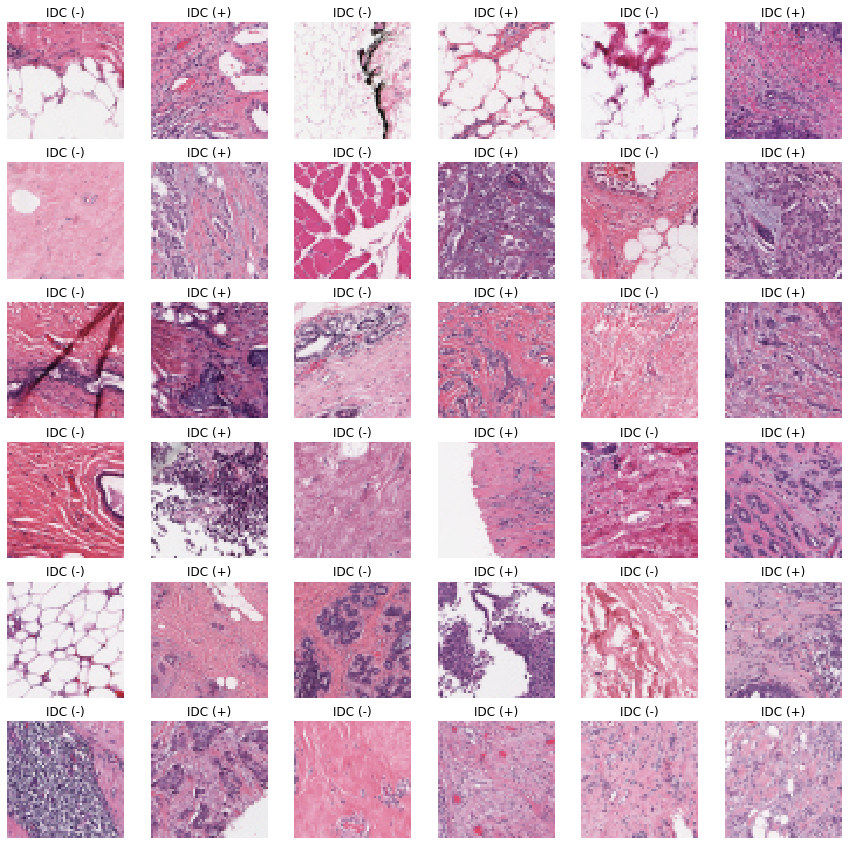

In [4]:
from keras.preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:
    
        img = image.load_img((non_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('IDC (-)')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    
        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

In [5]:
from matplotlib.image import imread
import cv2

some_non_img = random.sample(non_img, len(can_img))
some_can_img = random.sample(can_img, len(can_img))

non_img_arr = []
can_img_arr = []

for img in tqdm(some_non_img):
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in tqdm(some_can_img):
    
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

100%|████████████████████████████████████████████████████████████████████████████| 78786/78786 [30:24<00:00, 43.19it/s]


In [6]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in tqdm(breast_img_arr):
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

print('X shape : {}' .format(X.shape))

100%|██████████████████████████████████████████████████████████████████████| 157572/157572 [00:00<00:00, 219458.83it/s]


X shape : (157572, 50, 50, 3)


In [7]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_predict, y_train, y_true = train_test_split(X, y, test_size = 0.3, random_state = 7)

rate = 0.5
num = int(X.shape[0] * rate)

X_test = X_train[num:]
X_train = X_train[:num]

y_test = y_train[num:]
y_train = y_train[:num]

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_true = to_categorical(y_true, 2)

print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('X_predict shape : {}' .format(X_predict.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))
print('y_true shape : {}' .format(y_true.shape))

X_train shape : (78786, 50, 50, 3)
X_test shape : (31514, 50, 50, 3)
X_predict shape : (47272, 50, 50, 3)
y_train shape : (78786, 2)
y_test shape : (31514, 2)
y_true shape : (47272, 2)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(2, activation = 'sigmoid'))

model.summary()










Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [9]:
from keras.optimizers import Adam

Adam = Adam(learning_rate = 0.0001)
model.compile(loss = 'binary_crossentropy', optimizer = Adam, metrics = ['accuracy'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

"""
Transforming images
"""
dataGen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10,
                            horizontal_flip=True)

dataGen.fit(X_train)



In [15]:
# history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30, batch_size = 50)

history = model.fit(dataGen.flow(X_train, y_train,
                                batch_size=50),
                                epochs=30,
                                validation_data=(X_test, y_test),
                                shuffle=1)

Epoch 1/30


 185/1576 [==>...........................] - ETA: 51:10 - loss: 0.3356 - accuracy: 0.820 - ETA: 6:50 - loss: 0.2761 - accuracy: 0.850 - ETA: 7:07 - loss: 0.2546 - accuracy: 0.86 - ETA: 7:23 - loss: 0.2087 - accuracy: 0.90 - ETA: 7:13 - loss: 0.2045 - accuracy: 0.90 - ETA: 7:10 - loss: 0.2221 - accuracy: 0.89 - ETA: 7:05 - loss: 0.2392 - accuracy: 0.88 - ETA: 7:12 - loss: 0.2377 - accuracy: 0.89 - ETA: 7:15 - loss: 0.2486 - accuracy: 0.88 - ETA: 7:14 - loss: 0.2426 - accuracy: 0.89 - ETA: 7:17 - loss: 0.2474 - accuracy: 0.89 - ETA: 7:16 - loss: 0.2455 - accuracy: 0.89 - ETA: 7:15 - loss: 0.2454 - accuracy: 0.88 - ETA: 7:15 - loss: 0.2478 - accuracy: 0.89 - ETA: 7:14 - loss: 0.2476 - accuracy: 0.88 - ETA: 7:14 - loss: 0.2589 - accuracy: 0.88 - ETA: 7:13 - loss: 0.2563 - accuracy: 0.88 - ETA: 7:12 - loss: 0.2571 - accuracy: 0.88 - ETA: 7:11 - loss: 0.2565 - accuracy: 0.88 - ETA: 7:10 - loss: 0.2588 - accuracy: 0.88 - ETA: 7:09 - loss: 0.2565 - accuracy: 0.88 - ETA: 7:08 - loss: 0.2581 - a

 557/1576 [=========>....................] - ETA: 6:03 - loss: 0.2589 - accuracy: 0.89 - ETA: 6:03 - loss: 0.2589 - accuracy: 0.89 - ETA: 6:02 - loss: 0.2589 - accuracy: 0.89 - ETA: 6:02 - loss: 0.2592 - accuracy: 0.89 - ETA: 6:02 - loss: 0.2590 - accuracy: 0.89 - ETA: 6:02 - loss: 0.2588 - accuracy: 0.89 - ETA: 6:01 - loss: 0.2585 - accuracy: 0.89 - ETA: 6:01 - loss: 0.2582 - accuracy: 0.89 - ETA: 6:01 - loss: 0.2581 - accuracy: 0.89 - ETA: 6:00 - loss: 0.2580 - accuracy: 0.89 - ETA: 6:00 - loss: 0.2580 - accuracy: 0.89 - ETA: 6:00 - loss: 0.2583 - accuracy: 0.89 - ETA: 6:00 - loss: 0.2582 - accuracy: 0.89 - ETA: 6:00 - loss: 0.2582 - accuracy: 0.89 - ETA: 5:59 - loss: 0.2579 - accuracy: 0.89 - ETA: 5:59 - loss: 0.2578 - accuracy: 0.89 - ETA: 5:59 - loss: 0.2576 - accuracy: 0.89 - ETA: 5:59 - loss: 0.2580 - accuracy: 0.89 - ETA: 5:58 - loss: 0.2578 - accuracy: 0.89 - ETA: 5:58 - loss: 0.2582 - accuracy: 0.89 - ETA: 5:58 - loss: 0.2584 - accuracy: 0.89 - ETA: 5:57 - loss: 0.2582 - accu

 743/1576 [=============>................] - ETA: 5:04 - loss: 0.2570 - accuracy: 0.89 - ETA: 5:04 - loss: 0.2570 - accuracy: 0.89 - ETA: 5:04 - loss: 0.2568 - accuracy: 0.89 - ETA: 5:03 - loss: 0.2569 - accuracy: 0.89 - ETA: 5:03 - loss: 0.2571 - accuracy: 0.89 - ETA: 5:03 - loss: 0.2570 - accuracy: 0.89 - ETA: 5:02 - loss: 0.2570 - accuracy: 0.89 - ETA: 5:02 - loss: 0.2569 - accuracy: 0.89 - ETA: 5:02 - loss: 0.2569 - accuracy: 0.89 - ETA: 5:02 - loss: 0.2573 - accuracy: 0.89 - ETA: 5:01 - loss: 0.2572 - accuracy: 0.89 - ETA: 5:01 - loss: 0.2574 - accuracy: 0.89 - ETA: 5:01 - loss: 0.2573 - accuracy: 0.89 - ETA: 5:01 - loss: 0.2573 - accuracy: 0.89 - ETA: 5:00 - loss: 0.2575 - accuracy: 0.89 - ETA: 5:00 - loss: 0.2575 - accuracy: 0.89 - ETA: 5:00 - loss: 0.2575 - accuracy: 0.89 - ETA: 4:59 - loss: 0.2576 - accuracy: 0.89 - ETA: 4:59 - loss: 0.2576 - accuracy: 0.89 - ETA: 4:59 - loss: 0.2576 - accuracy: 0.89 - ETA: 4:58 - loss: 0.2575 - accuracy: 0.89 - ETA: 4:58 - loss: 0.2575 - accu

 929/1576 [================>.............] - ETA: 4:07 - loss: 0.2577 - accuracy: 0.89 - ETA: 4:06 - loss: 0.2579 - accuracy: 0.89 - ETA: 4:06 - loss: 0.2577 - accuracy: 0.89 - ETA: 4:06 - loss: 0.2577 - accuracy: 0.89 - ETA: 4:06 - loss: 0.2577 - accuracy: 0.89 - ETA: 4:05 - loss: 0.2577 - accuracy: 0.89 - ETA: 4:05 - loss: 0.2576 - accuracy: 0.89 - ETA: 4:05 - loss: 0.2576 - accuracy: 0.89 - ETA: 4:04 - loss: 0.2577 - accuracy: 0.89 - ETA: 4:04 - loss: 0.2578 - accuracy: 0.89 - ETA: 4:04 - loss: 0.2579 - accuracy: 0.89 - ETA: 4:04 - loss: 0.2580 - accuracy: 0.89 - ETA: 4:03 - loss: 0.2581 - accuracy: 0.89 - ETA: 4:03 - loss: 0.2581 - accuracy: 0.89 - ETA: 4:03 - loss: 0.2582 - accuracy: 0.89 - ETA: 4:03 - loss: 0.2583 - accuracy: 0.89 - ETA: 4:02 - loss: 0.2583 - accuracy: 0.89 - ETA: 4:02 - loss: 0.2584 - accuracy: 0.89 - ETA: 4:02 - loss: 0.2583 - accuracy: 0.89 - ETA: 4:01 - loss: 0.2583 - accuracy: 0.89 - ETA: 4:01 - loss: 0.2582 - accuracy: 0.89 - ETA: 4:01 - loss: 0.2580 - accu

1115/1576 [====================>.........] - ETA: 3:11 - loss: 0.2581 - accuracy: 0.89 - ETA: 3:11 - loss: 0.2582 - accuracy: 0.89 - ETA: 3:10 - loss: 0.2583 - accuracy: 0.89 - ETA: 3:10 - loss: 0.2583 - accuracy: 0.89 - ETA: 3:10 - loss: 0.2583 - accuracy: 0.89 - ETA: 3:09 - loss: 0.2583 - accuracy: 0.89 - ETA: 3:09 - loss: 0.2582 - accuracy: 0.89 - ETA: 3:09 - loss: 0.2582 - accuracy: 0.89 - ETA: 3:08 - loss: 0.2583 - accuracy: 0.89 - ETA: 3:08 - loss: 0.2582 - accuracy: 0.89 - ETA: 3:08 - loss: 0.2581 - accuracy: 0.89 - ETA: 3:08 - loss: 0.2581 - accuracy: 0.89 - ETA: 3:07 - loss: 0.2580 - accuracy: 0.89 - ETA: 3:07 - loss: 0.2579 - accuracy: 0.89 - ETA: 3:07 - loss: 0.2580 - accuracy: 0.89 - ETA: 3:06 - loss: 0.2579 - accuracy: 0.89 - ETA: 3:06 - loss: 0.2581 - accuracy: 0.89 - ETA: 3:06 - loss: 0.2580 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2580 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2580 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2581 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2583 - accu

1301/1576 [=======================>......] - ETA: 2:15 - loss: 0.2560 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2560 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2559 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2560 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2559 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2559 - accuracy: 0.89 - ETA: 2:13 - loss: 0.2558 - accuracy: 0.89 - ETA: 2:13 - loss: 0.2558 - accuracy: 0.89 - ETA: 2:13 - loss: 0.2558 - accuracy: 0.89 - ETA: 2:13 - loss: 0.2557 - accuracy: 0.89 - ETA: 2:12 - loss: 0.2557 - accuracy: 0.89 - ETA: 2:12 - loss: 0.2556 - accuracy: 0.89 - ETA: 2:12 - loss: 0.2557 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2557 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2557 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2559 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2559 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2557 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2558 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2557 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2556 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2556 - accu

1487/1576 [===========================>..] - ETA: 1:20 - loss: 0.2562 - accuracy: 0.89 - ETA: 1:20 - loss: 0.2561 - accuracy: 0.89 - ETA: 1:20 - loss: 0.2563 - accuracy: 0.89 - ETA: 1:20 - loss: 0.2562 - accuracy: 0.89 - ETA: 1:19 - loss: 0.2562 - accuracy: 0.89 - ETA: 1:19 - loss: 0.2562 - accuracy: 0.89 - ETA: 1:19 - loss: 0.2561 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2561 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2561 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2560 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2560 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2560 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2560 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2561 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2561 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2560 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2560 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2560 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2559 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2559 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2559 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2559 - accu

1576/1576 [==============================] - ETA: 25s - loss: 0.2552 - accuracy: 0.895 - ETA: 25s - loss: 0.2552 - accuracy: 0.895 - ETA: 25s - loss: 0.2552 - accuracy: 0.895 - ETA: 25s - loss: 0.2552 - accuracy: 0.895 - ETA: 24s - loss: 0.2552 - accuracy: 0.895 - ETA: 24s - loss: 0.2553 - accuracy: 0.895 - ETA: 24s - loss: 0.2552 - accuracy: 0.895 - ETA: 23s - loss: 0.2552 - accuracy: 0.895 - ETA: 23s - loss: 0.2551 - accuracy: 0.895 - ETA: 23s - loss: 0.2552 - accuracy: 0.895 - ETA: 22s - loss: 0.2552 - accuracy: 0.895 - ETA: 22s - loss: 0.2551 - accuracy: 0.895 - ETA: 22s - loss: 0.2551 - accuracy: 0.895 - ETA: 22s - loss: 0.2552 - accuracy: 0.895 - ETA: 21s - loss: 0.2552 - accuracy: 0.895 - ETA: 21s - loss: 0.2552 - accuracy: 0.895 - ETA: 21s - loss: 0.2552 - accuracy: 0.895 - ETA: 20s - loss: 0.2552 - accuracy: 0.895 - ETA: 20s - loss: 0.2551 - accuracy: 0.895 - ETA: 20s - loss: 0.2551 - accuracy: 0.895 - ETA: 20s - loss: 0.2551 - accuracy: 0.895 - ETA: 19s - loss: 0.2551 - accur

 186/1576 [==>...........................] - ETA: 8:19 - loss: 0.1162 - accuracy: 0.98 - ETA: 7:11 - loss: 0.1729 - accuracy: 0.92 - ETA: 7:14 - loss: 0.2515 - accuracy: 0.90 - ETA: 7:21 - loss: 0.2352 - accuracy: 0.91 - ETA: 7:17 - loss: 0.2550 - accuracy: 0.90 - ETA: 7:17 - loss: 0.2573 - accuracy: 0.90 - ETA: 7:17 - loss: 0.2651 - accuracy: 0.90 - ETA: 7:15 - loss: 0.2681 - accuracy: 0.89 - ETA: 7:12 - loss: 0.2637 - accuracy: 0.89 - ETA: 7:11 - loss: 0.2574 - accuracy: 0.90 - ETA: 7:10 - loss: 0.2620 - accuracy: 0.89 - ETA: 7:11 - loss: 0.2502 - accuracy: 0.90 - ETA: 7:10 - loss: 0.2524 - accuracy: 0.90 - ETA: 7:10 - loss: 0.2445 - accuracy: 0.90 - ETA: 7:10 - loss: 0.2368 - accuracy: 0.91 - ETA: 7:11 - loss: 0.2329 - accuracy: 0.91 - ETA: 7:10 - loss: 0.2432 - accuracy: 0.90 - ETA: 7:10 - loss: 0.2438 - accuracy: 0.91 - ETA: 7:10 - loss: 0.2423 - accuracy: 0.90 - ETA: 7:10 - loss: 0.2455 - accuracy: 0.90 - ETA: 7:09 - loss: 0.2501 - accuracy: 0.90 - ETA: 7:11 - loss: 0.2476 - accu

 558/1576 [=========>....................] - ETA: 5:42 - loss: 0.2501 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2499 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2502 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2506 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2503 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2502 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2502 - accuracy: 0.89 - ETA: 5:40 - loss: 0.2499 - accuracy: 0.89 - ETA: 5:40 - loss: 0.2496 - accuracy: 0.89 - ETA: 5:40 - loss: 0.2497 - accuracy: 0.89 - ETA: 5:40 - loss: 0.2498 - accuracy: 0.89 - ETA: 5:39 - loss: 0.2497 - accuracy: 0.89 - ETA: 5:39 - loss: 0.2495 - accuracy: 0.89 - ETA: 5:39 - loss: 0.2498 - accuracy: 0.89 - ETA: 5:39 - loss: 0.2496 - accuracy: 0.89 - ETA: 5:38 - loss: 0.2495 - accuracy: 0.89 - ETA: 5:38 - loss: 0.2492 - accuracy: 0.89 - ETA: 5:38 - loss: 0.2491 - accuracy: 0.89 - ETA: 5:38 - loss: 0.2489 - accuracy: 0.89 - ETA: 5:38 - loss: 0.2489 - accuracy: 0.89 - ETA: 5:37 - loss: 0.2488 - accuracy: 0.89 - ETA: 5:37 - loss: 0.2489 - accu

 744/1576 [=============>................] - ETA: 4:50 - loss: 0.2503 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2503 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2503 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2502 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2502 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2503 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2502 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2502 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2501 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2502 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2502 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2501 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2500 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2501 - accuracy: 0.89 - ETA: 4:46 - loss: 0.2503 - accuracy: 0.89 - ETA: 4:46 - loss: 0.2505 - accuracy: 0.89 - ETA: 4:46 - loss: 0.2505 - accuracy: 0.89 - ETA: 4:45 - loss: 0.2504 - accuracy: 0.89 - ETA: 4:45 - loss: 0.2502 - accuracy: 0.89 - ETA: 4:45 - loss: 0.2502 - accuracy: 0.89 - ETA: 4:45 - loss: 0.2501 - accuracy: 0.89 - ETA: 4:44 - loss: 0.2502 - accu

 930/1576 [================>.............] - ETA: 3:58 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2505 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2504 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2502 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2502 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2500 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2500 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2499 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2499 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2498 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2499 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2499 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2500 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2502 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2502 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2503 - accu

1116/1576 [====================>.........] - ETA: 3:05 - loss: 0.2514 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:01 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:01 - loss: 0.2510 - accuracy: 0.89 - ETA: 3:01 - loss: 0.2510 - accuracy: 0.89 - ETA: 3:01 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:00 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:00 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:00 - loss: 0.2508 - accuracy: 0.89 - ETA: 2:59 - loss: 0.2508 - accuracy: 0.89 - ETA: 2:59 - loss: 0.2507 - accuracy: 0.89 - ETA: 2:59 - loss: 0.2505 - accuracy: 0.89 - ETA: 2:59 - loss: 0.2507 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2520 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2520 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2519 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2519 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2519 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2519 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2519 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2519 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2519 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2518 - accuracy: 0.89 - ETA: 2:08 - loss: 0.2517 - accuracy: 0.89 - ETA: 2:08 - loss: 0.2517 - accuracy: 0.89 - ETA: 2:08 - loss: 0.2517 - accuracy: 0.89 - ETA: 2:08 - loss: 0.2518 - accuracy: 0.89 - ETA: 2:07 - loss: 0.2518 - accuracy: 0.89 - ETA: 2:07 - loss: 0.2518 - accuracy: 0.89 - ETA: 2:07 - loss: 0.2519 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2519 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2518 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2517 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2517 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2518 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2516 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2516 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2515 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2515 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2515 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2515 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2514 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2514 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2515 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2515 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2514 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2514 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2515 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2516 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2516 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2516 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2516 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2516 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2516 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2516 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2515 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2515 - accu

1576/1576 [==============================] - ETA: 25s - loss: 0.2515 - accuracy: 0.895 - ETA: 24s - loss: 0.2515 - accuracy: 0.895 - ETA: 24s - loss: 0.2514 - accuracy: 0.895 - ETA: 24s - loss: 0.2514 - accuracy: 0.895 - ETA: 24s - loss: 0.2514 - accuracy: 0.895 - ETA: 23s - loss: 0.2514 - accuracy: 0.895 - ETA: 23s - loss: 0.2514 - accuracy: 0.895 - ETA: 23s - loss: 0.2515 - accuracy: 0.895 - ETA: 22s - loss: 0.2516 - accuracy: 0.895 - ETA: 22s - loss: 0.2516 - accuracy: 0.895 - ETA: 22s - loss: 0.2517 - accuracy: 0.895 - ETA: 21s - loss: 0.2517 - accuracy: 0.895 - ETA: 21s - loss: 0.2516 - accuracy: 0.895 - ETA: 21s - loss: 0.2516 - accuracy: 0.895 - ETA: 21s - loss: 0.2516 - accuracy: 0.895 - ETA: 20s - loss: 0.2515 - accuracy: 0.895 - ETA: 20s - loss: 0.2515 - accuracy: 0.896 - ETA: 20s - loss: 0.2515 - accuracy: 0.895 - ETA: 19s - loss: 0.2516 - accuracy: 0.895 - ETA: 19s - loss: 0.2516 - accuracy: 0.895 - ETA: 19s - loss: 0.2517 - accuracy: 0.895 - ETA: 19s - loss: 0.2518 - accur

 186/1576 [==>...........................] - ETA: 8:27 - loss: 0.2232 - accuracy: 0.92 - ETA: 7:14 - loss: 0.2253 - accuracy: 0.92 - ETA: 7:25 - loss: 0.2340 - accuracy: 0.90 - ETA: 7:19 - loss: 0.2222 - accuracy: 0.90 - ETA: 7:21 - loss: 0.2264 - accuracy: 0.90 - ETA: 7:18 - loss: 0.2219 - accuracy: 0.90 - ETA: 7:19 - loss: 0.2269 - accuracy: 0.90 - ETA: 7:19 - loss: 0.2386 - accuracy: 0.90 - ETA: 7:17 - loss: 0.2364 - accuracy: 0.90 - ETA: 7:17 - loss: 0.2585 - accuracy: 0.89 - ETA: 7:17 - loss: 0.2473 - accuracy: 0.89 - ETA: 7:16 - loss: 0.2491 - accuracy: 0.89 - ETA: 7:15 - loss: 0.2636 - accuracy: 0.89 - ETA: 7:15 - loss: 0.2593 - accuracy: 0.89 - ETA: 7:18 - loss: 0.2631 - accuracy: 0.89 - ETA: 7:18 - loss: 0.2687 - accuracy: 0.88 - ETA: 7:18 - loss: 0.2620 - accuracy: 0.89 - ETA: 7:17 - loss: 0.2576 - accuracy: 0.89 - ETA: 7:17 - loss: 0.2582 - accuracy: 0.89 - ETA: 7:16 - loss: 0.2555 - accuracy: 0.89 - ETA: 7:15 - loss: 0.2575 - accuracy: 0.89 - ETA: 7:15 - loss: 0.2584 - accu

 558/1576 [=========>....................] - ETA: 5:49 - loss: 0.2517 - accuracy: 0.89 - ETA: 5:49 - loss: 0.2515 - accuracy: 0.89 - ETA: 5:49 - loss: 0.2513 - accuracy: 0.89 - ETA: 5:49 - loss: 0.2512 - accuracy: 0.89 - ETA: 5:48 - loss: 0.2512 - accuracy: 0.89 - ETA: 5:48 - loss: 0.2514 - accuracy: 0.89 - ETA: 5:48 - loss: 0.2514 - accuracy: 0.89 - ETA: 5:47 - loss: 0.2514 - accuracy: 0.89 - ETA: 5:47 - loss: 0.2513 - accuracy: 0.89 - ETA: 5:47 - loss: 0.2511 - accuracy: 0.89 - ETA: 5:47 - loss: 0.2510 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2507 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2511 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2510 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2509 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2507 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2506 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2506 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2503 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2501 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2500 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2499 - accu

 744/1576 [=============>................] - ETA: 4:55 - loss: 0.2522 - accuracy: 0.89 - ETA: 4:54 - loss: 0.2518 - accuracy: 0.89 - ETA: 4:54 - loss: 0.2519 - accuracy: 0.89 - ETA: 4:54 - loss: 0.2519 - accuracy: 0.89 - ETA: 4:53 - loss: 0.2518 - accuracy: 0.89 - ETA: 4:53 - loss: 0.2520 - accuracy: 0.89 - ETA: 4:53 - loss: 0.2519 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2519 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2518 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2517 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2516 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2514 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2513 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2514 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2514 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2514 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2515 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2514 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2513 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2516 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2519 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2517 - accu

 930/1576 [================>.............] - ETA: 4:01 - loss: 0.2503 - accuracy: 0.89 - ETA: 4:00 - loss: 0.2503 - accuracy: 0.89 - ETA: 4:00 - loss: 0.2504 - accuracy: 0.89 - ETA: 4:00 - loss: 0.2502 - accuracy: 0.89 - ETA: 3:59 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:59 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:59 - loss: 0.2502 - accuracy: 0.89 - ETA: 3:59 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2500 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2500 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2498 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2497 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2496 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2495 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2494 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2493 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2493 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2493 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2493 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2493 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2493 - accu

1116/1576 [====================>.........] - ETA: 3:06 - loss: 0.2510 - accuracy: 0.89 - ETA: 3:06 - loss: 0.2510 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2508 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2508 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2510 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2510 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2510 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:01 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:01 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:01 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:01 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:00 - loss: 0.2513 - accuracy: 0.89 - ETA: 3:00 - loss: 0.2512 - accu

1302/1576 [=======================>......] - ETA: 2:12 - loss: 0.2508 - accuracy: 0.89 - ETA: 2:12 - loss: 0.2507 - accuracy: 0.89 - ETA: 2:12 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2505 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2505 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2505 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2504 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2504 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2505 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2505 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2505 - accuracy: 0.89 - ETA: 2:08 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:08 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:08 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:08 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:07 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:07 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:07 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:07 - loss: 0.2507 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2507 - accu

1488/1576 [===========================>..] - ETA: 1:19 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2506 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2506 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2506 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2504 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2504 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2504 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2504 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2504 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2503 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2503 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2502 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2503 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2503 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2502 - accu

1576/1576 [==============================] - ETA: 25s - loss: 0.2507 - accuracy: 0.897 - ETA: 24s - loss: 0.2506 - accuracy: 0.897 - ETA: 24s - loss: 0.2506 - accuracy: 0.897 - ETA: 24s - loss: 0.2506 - accuracy: 0.897 - ETA: 24s - loss: 0.2506 - accuracy: 0.897 - ETA: 23s - loss: 0.2506 - accuracy: 0.897 - ETA: 23s - loss: 0.2506 - accuracy: 0.897 - ETA: 23s - loss: 0.2505 - accuracy: 0.897 - ETA: 22s - loss: 0.2505 - accuracy: 0.897 - ETA: 22s - loss: 0.2505 - accuracy: 0.897 - ETA: 22s - loss: 0.2505 - accuracy: 0.897 - ETA: 21s - loss: 0.2506 - accuracy: 0.897 - ETA: 21s - loss: 0.2505 - accuracy: 0.897 - ETA: 21s - loss: 0.2505 - accuracy: 0.897 - ETA: 21s - loss: 0.2505 - accuracy: 0.897 - ETA: 20s - loss: 0.2505 - accuracy: 0.897 - ETA: 20s - loss: 0.2506 - accuracy: 0.897 - ETA: 20s - loss: 0.2506 - accuracy: 0.897 - ETA: 19s - loss: 0.2506 - accuracy: 0.897 - ETA: 19s - loss: 0.2506 - accuracy: 0.897 - ETA: 19s - loss: 0.2507 - accuracy: 0.897 - ETA: 19s - loss: 0.2508 - accur

 186/1576 [==>...........................] - ETA: 10:42 - loss: 0.2605 - accuracy: 0.880 - ETA: 8:04 - loss: 0.2581 - accuracy: 0.910 - ETA: 8:16 - loss: 0.2283 - accuracy: 0.92 - ETA: 8:05 - loss: 0.2506 - accuracy: 0.91 - ETA: 8:07 - loss: 0.2394 - accuracy: 0.90 - ETA: 8:12 - loss: 0.2483 - accuracy: 0.90 - ETA: 8:13 - loss: 0.2299 - accuracy: 0.91 - ETA: 8:08 - loss: 0.2267 - accuracy: 0.91 - ETA: 8:10 - loss: 0.2260 - accuracy: 0.91 - ETA: 8:09 - loss: 0.2129 - accuracy: 0.91 - ETA: 8:06 - loss: 0.2156 - accuracy: 0.91 - ETA: 8:04 - loss: 0.2160 - accuracy: 0.91 - ETA: 8:04 - loss: 0.2202 - accuracy: 0.91 - ETA: 8:03 - loss: 0.2159 - accuracy: 0.91 - ETA: 8:03 - loss: 0.2166 - accuracy: 0.91 - ETA: 8:00 - loss: 0.2182 - accuracy: 0.90 - ETA: 7:58 - loss: 0.2167 - accuracy: 0.91 - ETA: 7:56 - loss: 0.2255 - accuracy: 0.90 - ETA: 7:58 - loss: 0.2288 - accuracy: 0.90 - ETA: 7:57 - loss: 0.2326 - accuracy: 0.90 - ETA: 7:55 - loss: 0.2296 - accuracy: 0.90 - ETA: 7:53 - loss: 0.2331 - a

 558/1576 [=========>....................] - ETA: 5:57 - loss: 0.2513 - accuracy: 0.89 - ETA: 5:56 - loss: 0.2515 - accuracy: 0.89 - ETA: 5:56 - loss: 0.2517 - accuracy: 0.89 - ETA: 5:56 - loss: 0.2514 - accuracy: 0.89 - ETA: 5:55 - loss: 0.2516 - accuracy: 0.89 - ETA: 5:55 - loss: 0.2519 - accuracy: 0.89 - ETA: 5:55 - loss: 0.2518 - accuracy: 0.89 - ETA: 5:54 - loss: 0.2516 - accuracy: 0.89 - ETA: 5:54 - loss: 0.2516 - accuracy: 0.89 - ETA: 5:53 - loss: 0.2515 - accuracy: 0.89 - ETA: 5:53 - loss: 0.2517 - accuracy: 0.89 - ETA: 5:53 - loss: 0.2519 - accuracy: 0.89 - ETA: 5:52 - loss: 0.2515 - accuracy: 0.89 - ETA: 5:52 - loss: 0.2518 - accuracy: 0.89 - ETA: 5:52 - loss: 0.2513 - accuracy: 0.89 - ETA: 5:51 - loss: 0.2515 - accuracy: 0.89 - ETA: 5:51 - loss: 0.2514 - accuracy: 0.89 - ETA: 5:51 - loss: 0.2512 - accuracy: 0.89 - ETA: 5:50 - loss: 0.2513 - accuracy: 0.89 - ETA: 5:50 - loss: 0.2513 - accuracy: 0.89 - ETA: 5:50 - loss: 0.2515 - accuracy: 0.89 - ETA: 5:49 - loss: 0.2513 - accu

 744/1576 [=============>................] - ETA: 4:57 - loss: 0.2511 - accuracy: 0.89 - ETA: 4:57 - loss: 0.2510 - accuracy: 0.89 - ETA: 4:56 - loss: 0.2510 - accuracy: 0.89 - ETA: 4:56 - loss: 0.2508 - accuracy: 0.89 - ETA: 4:56 - loss: 0.2508 - accuracy: 0.89 - ETA: 4:56 - loss: 0.2506 - accuracy: 0.89 - ETA: 4:55 - loss: 0.2505 - accuracy: 0.89 - ETA: 4:55 - loss: 0.2505 - accuracy: 0.89 - ETA: 4:55 - loss: 0.2508 - accuracy: 0.89 - ETA: 4:54 - loss: 0.2509 - accuracy: 0.89 - ETA: 4:54 - loss: 0.2507 - accuracy: 0.89 - ETA: 4:54 - loss: 0.2507 - accuracy: 0.89 - ETA: 4:53 - loss: 0.2508 - accuracy: 0.89 - ETA: 4:53 - loss: 0.2507 - accuracy: 0.89 - ETA: 4:53 - loss: 0.2507 - accuracy: 0.89 - ETA: 4:53 - loss: 0.2507 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2506 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2508 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2508 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2506 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2506 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2508 - accu

 930/1576 [================>.............] - ETA: 4:01 - loss: 0.2511 - accuracy: 0.89 - ETA: 4:01 - loss: 0.2512 - accuracy: 0.89 - ETA: 4:01 - loss: 0.2511 - accuracy: 0.89 - ETA: 4:00 - loss: 0.2510 - accuracy: 0.89 - ETA: 4:00 - loss: 0.2511 - accuracy: 0.89 - ETA: 4:00 - loss: 0.2509 - accuracy: 0.89 - ETA: 4:00 - loss: 0.2508 - accuracy: 0.89 - ETA: 3:59 - loss: 0.2510 - accuracy: 0.89 - ETA: 3:59 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:59 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2510 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2511 - accu

1116/1576 [====================>.........] - ETA: 3:07 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:07 - loss: 0.2502 - accuracy: 0.89 - ETA: 3:07 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:06 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:06 - loss: 0.2502 - accuracy: 0.89 - ETA: 3:06 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:06 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2500 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2499 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2500 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2500 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2500 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2499 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2498 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2498 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2497 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2496 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2496 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2498 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2498 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2499 - accuracy: 0.89 - ETA: 3:01 - loss: 0.2499 - accu

1302/1576 [=======================>......] - ETA: 2:15 - loss: 0.2497 - accuracy: 0.89 - ETA: 2:15 - loss: 0.2496 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2497 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2497 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2496 - accuracy: 0.89 - ETA: 2:14 - loss: 0.2496 - accuracy: 0.89 - ETA: 2:13 - loss: 0.2496 - accuracy: 0.89 - ETA: 2:13 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:13 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:12 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:12 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:12 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:12 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:11 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2496 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2493 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2493 - accu

1488/1576 [===========================>..] - ETA: 1:24 - loss: 0.2491 - accuracy: 0.89 - ETA: 1:23 - loss: 0.2491 - accuracy: 0.89 - ETA: 1:23 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:23 - loss: 0.2491 - accuracy: 0.89 - ETA: 1:23 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:22 - loss: 0.2491 - accuracy: 0.89 - ETA: 1:22 - loss: 0.2491 - accuracy: 0.89 - ETA: 1:22 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:22 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:21 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:21 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:21 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:21 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:20 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:20 - loss: 0.2491 - accuracy: 0.89 - ETA: 1:20 - loss: 0.2491 - accuracy: 0.89 - ETA: 1:19 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:19 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:19 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:19 - loss: 0.2493 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2492 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2492 - accu

1576/1576 [==============================] - ETA: 27s - loss: 0.2494 - accuracy: 0.898 - ETA: 27s - loss: 0.2493 - accuracy: 0.898 - ETA: 27s - loss: 0.2493 - accuracy: 0.898 - ETA: 26s - loss: 0.2492 - accuracy: 0.898 - ETA: 26s - loss: 0.2492 - accuracy: 0.898 - ETA: 26s - loss: 0.2493 - accuracy: 0.898 - ETA: 25s - loss: 0.2492 - accuracy: 0.898 - ETA: 25s - loss: 0.2492 - accuracy: 0.898 - ETA: 25s - loss: 0.2492 - accuracy: 0.898 - ETA: 24s - loss: 0.2492 - accuracy: 0.898 - ETA: 24s - loss: 0.2492 - accuracy: 0.898 - ETA: 24s - loss: 0.2492 - accuracy: 0.898 - ETA: 23s - loss: 0.2492 - accuracy: 0.898 - ETA: 23s - loss: 0.2491 - accuracy: 0.898 - ETA: 23s - loss: 0.2493 - accuracy: 0.898 - ETA: 23s - loss: 0.2492 - accuracy: 0.898 - ETA: 22s - loss: 0.2492 - accuracy: 0.898 - ETA: 22s - loss: 0.2492 - accuracy: 0.898 - ETA: 22s - loss: 0.2492 - accuracy: 0.898 - ETA: 21s - loss: 0.2491 - accuracy: 0.898 - ETA: 21s - loss: 0.2492 - accuracy: 0.898 - ETA: 21s - loss: 0.2492 - accur

 181/1576 [==>...........................] - ETA: 14:23 - loss: 0.4027 - accuracy: 0.800 - ETA: 10:12 - loss: 0.3947 - accuracy: 0.820 - ETA: 10:33 - loss: 0.3627 - accuracy: 0.833 - ETA: 10:07 - loss: 0.3197 - accuracy: 0.860 - ETA: 10:23 - loss: 0.2920 - accuracy: 0.872 - ETA: 10:21 - loss: 0.2756 - accuracy: 0.883 - ETA: 10:21 - loss: 0.2771 - accuracy: 0.882 - ETA: 10:35 - loss: 0.2785 - accuracy: 0.885 - ETA: 10:52 - loss: 0.2645 - accuracy: 0.891 - ETA: 11:22 - loss: 0.2661 - accuracy: 0.886 - ETA: 11:20 - loss: 0.2520 - accuracy: 0.890 - ETA: 11:12 - loss: 0.2467 - accuracy: 0.895 - ETA: 11:09 - loss: 0.2361 - accuracy: 0.898 - ETA: 11:03 - loss: 0.2325 - accuracy: 0.898 - ETA: 10:54 - loss: 0.2310 - accuracy: 0.900 - ETA: 10:49 - loss: 0.2339 - accuracy: 0.898 - ETA: 10:42 - loss: 0.2368 - accuracy: 0.897 - ETA: 10:43 - loss: 0.2314 - accuracy: 0.900 - ETA: 10:41 - loss: 0.2349 - accuracy: 0.898 - ETA: 10:40 - loss: 0.2360 - accuracy: 0.898 - ETA: 10:39 - loss: 0.2393 - accurac

 553/1576 [=========>....................] - ETA: 8:08 - loss: 0.2487 - accuracy: 0.89 - ETA: 8:08 - loss: 0.2485 - accuracy: 0.89 - ETA: 8:07 - loss: 0.2487 - accuracy: 0.89 - ETA: 8:07 - loss: 0.2490 - accuracy: 0.89 - ETA: 8:07 - loss: 0.2490 - accuracy: 0.89 - ETA: 8:06 - loss: 0.2491 - accuracy: 0.89 - ETA: 8:06 - loss: 0.2492 - accuracy: 0.89 - ETA: 8:06 - loss: 0.2492 - accuracy: 0.89 - ETA: 8:05 - loss: 0.2492 - accuracy: 0.89 - ETA: 8:05 - loss: 0.2491 - accuracy: 0.89 - ETA: 8:04 - loss: 0.2492 - accuracy: 0.89 - ETA: 8:04 - loss: 0.2489 - accuracy: 0.89 - ETA: 8:03 - loss: 0.2491 - accuracy: 0.89 - ETA: 8:03 - loss: 0.2490 - accuracy: 0.89 - ETA: 8:02 - loss: 0.2491 - accuracy: 0.89 - ETA: 8:02 - loss: 0.2493 - accuracy: 0.89 - ETA: 8:02 - loss: 0.2491 - accuracy: 0.89 - ETA: 8:02 - loss: 0.2491 - accuracy: 0.89 - ETA: 8:02 - loss: 0.2495 - accuracy: 0.89 - ETA: 8:01 - loss: 0.2493 - accuracy: 0.89 - ETA: 8:01 - loss: 0.2497 - accuracy: 0.89 - ETA: 8:01 - loss: 0.2499 - accu

 739/1576 [=============>................] - ETA: 6:52 - loss: 0.2470 - accuracy: 0.89 - ETA: 6:52 - loss: 0.2471 - accuracy: 0.89 - ETA: 6:51 - loss: 0.2470 - accuracy: 0.89 - ETA: 6:51 - loss: 0.2471 - accuracy: 0.89 - ETA: 6:50 - loss: 0.2471 - accuracy: 0.89 - ETA: 6:50 - loss: 0.2473 - accuracy: 0.89 - ETA: 6:49 - loss: 0.2472 - accuracy: 0.89 - ETA: 6:49 - loss: 0.2471 - accuracy: 0.89 - ETA: 6:48 - loss: 0.2472 - accuracy: 0.89 - ETA: 6:48 - loss: 0.2473 - accuracy: 0.89 - ETA: 6:47 - loss: 0.2473 - accuracy: 0.89 - ETA: 6:47 - loss: 0.2472 - accuracy: 0.89 - ETA: 6:46 - loss: 0.2473 - accuracy: 0.89 - ETA: 6:46 - loss: 0.2472 - accuracy: 0.89 - ETA: 6:45 - loss: 0.2472 - accuracy: 0.89 - ETA: 6:45 - loss: 0.2471 - accuracy: 0.89 - ETA: 6:45 - loss: 0.2470 - accuracy: 0.89 - ETA: 6:44 - loss: 0.2470 - accuracy: 0.89 - ETA: 6:44 - loss: 0.2471 - accuracy: 0.89 - ETA: 6:43 - loss: 0.2472 - accuracy: 0.89 - ETA: 6:43 - loss: 0.2472 - accuracy: 0.89 - ETA: 6:42 - loss: 0.2471 - accu

 925/1576 [================>.............] - ETA: 5:36 - loss: 0.2474 - accuracy: 0.89 - ETA: 5:36 - loss: 0.2474 - accuracy: 0.89 - ETA: 5:35 - loss: 0.2474 - accuracy: 0.89 - ETA: 5:35 - loss: 0.2474 - accuracy: 0.89 - ETA: 5:35 - loss: 0.2473 - accuracy: 0.89 - ETA: 5:34 - loss: 0.2472 - accuracy: 0.89 - ETA: 5:34 - loss: 0.2473 - accuracy: 0.89 - ETA: 5:33 - loss: 0.2475 - accuracy: 0.89 - ETA: 5:33 - loss: 0.2476 - accuracy: 0.89 - ETA: 5:32 - loss: 0.2476 - accuracy: 0.89 - ETA: 5:32 - loss: 0.2476 - accuracy: 0.89 - ETA: 5:32 - loss: 0.2476 - accuracy: 0.89 - ETA: 5:31 - loss: 0.2478 - accuracy: 0.89 - ETA: 5:31 - loss: 0.2478 - accuracy: 0.89 - ETA: 5:31 - loss: 0.2479 - accuracy: 0.89 - ETA: 5:30 - loss: 0.2481 - accuracy: 0.89 - ETA: 5:30 - loss: 0.2480 - accuracy: 0.89 - ETA: 5:29 - loss: 0.2479 - accuracy: 0.89 - ETA: 5:29 - loss: 0.2479 - accuracy: 0.89 - ETA: 5:29 - loss: 0.2479 - accuracy: 0.89 - ETA: 5:28 - loss: 0.2479 - accuracy: 0.89 - ETA: 5:28 - loss: 0.2479 - accu

1111/1576 [====================>.........] - ETA: 4:15 - loss: 0.2498 - accuracy: 0.89 - ETA: 4:15 - loss: 0.2497 - accuracy: 0.89 - ETA: 4:14 - loss: 0.2496 - accuracy: 0.89 - ETA: 4:14 - loss: 0.2496 - accuracy: 0.89 - ETA: 4:13 - loss: 0.2496 - accuracy: 0.89 - ETA: 4:13 - loss: 0.2496 - accuracy: 0.89 - ETA: 4:13 - loss: 0.2497 - accuracy: 0.89 - ETA: 4:12 - loss: 0.2498 - accuracy: 0.89 - ETA: 4:12 - loss: 0.2497 - accuracy: 0.89 - ETA: 4:11 - loss: 0.2497 - accuracy: 0.89 - ETA: 4:11 - loss: 0.2497 - accuracy: 0.89 - ETA: 4:11 - loss: 0.2500 - accuracy: 0.89 - ETA: 4:10 - loss: 0.2501 - accuracy: 0.89 - ETA: 4:10 - loss: 0.2500 - accuracy: 0.89 - ETA: 4:09 - loss: 0.2500 - accuracy: 0.89 - ETA: 4:09 - loss: 0.2500 - accuracy: 0.89 - ETA: 4:08 - loss: 0.2500 - accuracy: 0.89 - ETA: 4:08 - loss: 0.2499 - accuracy: 0.89 - ETA: 4:07 - loss: 0.2499 - accuracy: 0.89 - ETA: 4:07 - loss: 0.2498 - accuracy: 0.89 - ETA: 4:07 - loss: 0.2497 - accuracy: 0.89 - ETA: 4:06 - loss: 0.2497 - accu

1297/1576 [=======================>......] - ETA: 2:58 - loss: 0.2505 - accuracy: 0.89 - ETA: 2:58 - loss: 0.2505 - accuracy: 0.89 - ETA: 2:58 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:57 - loss: 0.2505 - accuracy: 0.89 - ETA: 2:57 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:56 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:56 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:56 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:55 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:55 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:54 - loss: 0.2508 - accuracy: 0.89 - ETA: 2:54 - loss: 0.2507 - accuracy: 0.89 - ETA: 2:54 - loss: 0.2507 - accuracy: 0.89 - ETA: 2:53 - loss: 0.2507 - accuracy: 0.89 - ETA: 2:53 - loss: 0.2507 - accuracy: 0.89 - ETA: 2:52 - loss: 0.2507 - accuracy: 0.89 - ETA: 2:52 - loss: 0.2507 - accuracy: 0.89 - ETA: 2:52 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:51 - loss: 0.2505 - accuracy: 0.89 - ETA: 2:51 - loss: 0.2506 - accuracy: 0.89 - ETA: 2:50 - loss: 0.2508 - accuracy: 0.89 - ETA: 2:50 - loss: 0.2508 - accu

1483/1576 [===========================>..] - ETA: 1:46 - loss: 0.2501 - accuracy: 0.89 - ETA: 1:45 - loss: 0.2501 - accuracy: 0.89 - ETA: 1:45 - loss: 0.2501 - accuracy: 0.89 - ETA: 1:44 - loss: 0.2500 - accuracy: 0.89 - ETA: 1:44 - loss: 0.2500 - accuracy: 0.89 - ETA: 1:44 - loss: 0.2499 - accuracy: 0.89 - ETA: 1:43 - loss: 0.2500 - accuracy: 0.89 - ETA: 1:43 - loss: 0.2500 - accuracy: 0.89 - ETA: 1:43 - loss: 0.2500 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2503 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2502 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2502 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2501 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2501 - accuracy: 0.89 - ETA: 1:40 - loss: 0.2502 - accuracy: 0.89 - ETA: 1:40 - loss: 0.2504 - accuracy: 0.89 - ETA: 1:39 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:39 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:39 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:38 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:38 - loss: 0.2505 - accuracy: 0.89 - ETA: 1:38 - loss: 0.2506 - accu

1576/1576 [==============================] - ETA: 34s - loss: 0.2485 - accuracy: 0.897 - ETA: 34s - loss: 0.2485 - accuracy: 0.897 - ETA: 33s - loss: 0.2484 - accuracy: 0.897 - ETA: 33s - loss: 0.2484 - accuracy: 0.897 - ETA: 33s - loss: 0.2483 - accuracy: 0.897 - ETA: 32s - loss: 0.2484 - accuracy: 0.897 - ETA: 32s - loss: 0.2484 - accuracy: 0.897 - ETA: 31s - loss: 0.2485 - accuracy: 0.897 - ETA: 31s - loss: 0.2484 - accuracy: 0.897 - ETA: 31s - loss: 0.2483 - accuracy: 0.897 - ETA: 30s - loss: 0.2483 - accuracy: 0.897 - ETA: 30s - loss: 0.2482 - accuracy: 0.897 - ETA: 30s - loss: 0.2482 - accuracy: 0.897 - ETA: 29s - loss: 0.2483 - accuracy: 0.897 - ETA: 29s - loss: 0.2482 - accuracy: 0.897 - ETA: 28s - loss: 0.2482 - accuracy: 0.897 - ETA: 28s - loss: 0.2483 - accuracy: 0.897 - ETA: 28s - loss: 0.2485 - accuracy: 0.897 - ETA: 27s - loss: 0.2485 - accuracy: 0.897 - ETA: 27s - loss: 0.2485 - accuracy: 0.897 - ETA: 27s - loss: 0.2486 - accuracy: 0.897 - ETA: 26s - loss: 0.2486 - accur

 184/1576 [==>...........................] - ETA: 12:21 - loss: 0.2127 - accuracy: 0.920 - ETA: 8:55 - loss: 0.2812 - accuracy: 0.880 - ETA: 9:56 - loss: 0.2355 - accuracy: 0.90 - ETA: 11:10 - loss: 0.2179 - accuracy: 0.915 - ETA: 11:33 - loss: 0.2163 - accuracy: 0.908 - ETA: 11:21 - loss: 0.2268 - accuracy: 0.896 - ETA: 11:05 - loss: 0.2586 - accuracy: 0.882 - ETA: 11:02 - loss: 0.2507 - accuracy: 0.887 - ETA: 11:14 - loss: 0.2492 - accuracy: 0.891 - ETA: 11:14 - loss: 0.2454 - accuracy: 0.890 - ETA: 11:08 - loss: 0.2363 - accuracy: 0.890 - ETA: 11:07 - loss: 0.2340 - accuracy: 0.891 - ETA: 10:59 - loss: 0.2378 - accuracy: 0.890 - ETA: 10:54 - loss: 0.2454 - accuracy: 0.885 - ETA: 10:53 - loss: 0.2432 - accuracy: 0.888 - ETA: 10:48 - loss: 0.2415 - accuracy: 0.890 - ETA: 10:45 - loss: 0.2401 - accuracy: 0.891 - ETA: 10:40 - loss: 0.2451 - accuracy: 0.891 - ETA: 10:33 - loss: 0.2398 - accuracy: 0.892 - ETA: 10:33 - loss: 0.2438 - accuracy: 0.889 - ETA: 10:31 - loss: 0.2441 - accuracy: 

 556/1576 [=========>....................] - ETA: 6:33 - loss: 0.2538 - accuracy: 0.89 - ETA: 6:33 - loss: 0.2536 - accuracy: 0.89 - ETA: 6:32 - loss: 0.2541 - accuracy: 0.89 - ETA: 6:32 - loss: 0.2538 - accuracy: 0.89 - ETA: 6:31 - loss: 0.2537 - accuracy: 0.89 - ETA: 6:31 - loss: 0.2536 - accuracy: 0.89 - ETA: 6:30 - loss: 0.2539 - accuracy: 0.89 - ETA: 6:30 - loss: 0.2539 - accuracy: 0.89 - ETA: 6:30 - loss: 0.2538 - accuracy: 0.89 - ETA: 6:29 - loss: 0.2538 - accuracy: 0.89 - ETA: 6:29 - loss: 0.2534 - accuracy: 0.89 - ETA: 6:28 - loss: 0.2534 - accuracy: 0.89 - ETA: 6:28 - loss: 0.2539 - accuracy: 0.89 - ETA: 6:27 - loss: 0.2541 - accuracy: 0.89 - ETA: 6:27 - loss: 0.2539 - accuracy: 0.89 - ETA: 6:26 - loss: 0.2538 - accuracy: 0.89 - ETA: 6:26 - loss: 0.2541 - accuracy: 0.89 - ETA: 6:25 - loss: 0.2540 - accuracy: 0.89 - ETA: 6:25 - loss: 0.2539 - accuracy: 0.89 - ETA: 6:24 - loss: 0.2539 - accuracy: 0.89 - ETA: 6:24 - loss: 0.2538 - accuracy: 0.89 - ETA: 6:24 - loss: 0.2537 - accu

 742/1576 [=============>................] - ETA: 5:36 - loss: 0.2518 - accuracy: 0.89 - ETA: 5:36 - loss: 0.2517 - accuracy: 0.89 - ETA: 5:36 - loss: 0.2515 - accuracy: 0.89 - ETA: 5:35 - loss: 0.2518 - accuracy: 0.89 - ETA: 5:35 - loss: 0.2516 - accuracy: 0.89 - ETA: 5:35 - loss: 0.2516 - accuracy: 0.89 - ETA: 5:34 - loss: 0.2515 - accuracy: 0.89 - ETA: 5:34 - loss: 0.2514 - accuracy: 0.89 - ETA: 5:34 - loss: 0.2515 - accuracy: 0.89 - ETA: 5:34 - loss: 0.2513 - accuracy: 0.89 - ETA: 5:33 - loss: 0.2515 - accuracy: 0.89 - ETA: 5:33 - loss: 0.2520 - accuracy: 0.89 - ETA: 5:33 - loss: 0.2522 - accuracy: 0.89 - ETA: 5:33 - loss: 0.2524 - accuracy: 0.89 - ETA: 5:32 - loss: 0.2522 - accuracy: 0.89 - ETA: 5:32 - loss: 0.2521 - accuracy: 0.89 - ETA: 5:32 - loss: 0.2523 - accuracy: 0.89 - ETA: 5:32 - loss: 0.2522 - accuracy: 0.89 - ETA: 5:32 - loss: 0.2524 - accuracy: 0.89 - ETA: 5:32 - loss: 0.2524 - accuracy: 0.89 - ETA: 5:31 - loss: 0.2524 - accuracy: 0.89 - ETA: 5:31 - loss: 0.2525 - accu

 928/1576 [================>.............] - ETA: 4:30 - loss: 0.2523 - accuracy: 0.89 - ETA: 4:30 - loss: 0.2524 - accuracy: 0.89 - ETA: 4:29 - loss: 0.2523 - accuracy: 0.89 - ETA: 4:29 - loss: 0.2523 - accuracy: 0.89 - ETA: 4:29 - loss: 0.2523 - accuracy: 0.89 - ETA: 4:28 - loss: 0.2523 - accuracy: 0.89 - ETA: 4:28 - loss: 0.2524 - accuracy: 0.89 - ETA: 4:28 - loss: 0.2526 - accuracy: 0.89 - ETA: 4:27 - loss: 0.2524 - accuracy: 0.89 - ETA: 4:27 - loss: 0.2525 - accuracy: 0.89 - ETA: 4:26 - loss: 0.2525 - accuracy: 0.89 - ETA: 4:26 - loss: 0.2524 - accuracy: 0.89 - ETA: 4:26 - loss: 0.2523 - accuracy: 0.89 - ETA: 4:25 - loss: 0.2523 - accuracy: 0.89 - ETA: 4:25 - loss: 0.2524 - accuracy: 0.89 - ETA: 4:25 - loss: 0.2523 - accuracy: 0.89 - ETA: 4:25 - loss: 0.2522 - accuracy: 0.89 - ETA: 4:24 - loss: 0.2523 - accuracy: 0.89 - ETA: 4:24 - loss: 0.2523 - accuracy: 0.89 - ETA: 4:24 - loss: 0.2524 - accuracy: 0.89 - ETA: 4:23 - loss: 0.2523 - accuracy: 0.89 - ETA: 4:23 - loss: 0.2523 - accu

1114/1576 [====================>.........] - ETA: 3:32 - loss: 0.2505 - accuracy: 0.89 - ETA: 3:32 - loss: 0.2505 - accuracy: 0.89 - ETA: 3:31 - loss: 0.2504 - accuracy: 0.89 - ETA: 3:31 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:31 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:31 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:30 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:30 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:30 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:30 - loss: 0.2502 - accuracy: 0.89 - ETA: 3:29 - loss: 0.2502 - accuracy: 0.89 - ETA: 3:29 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:29 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:28 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:28 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:28 - loss: 0.2500 - accuracy: 0.89 - ETA: 3:28 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:27 - loss: 0.2501 - accuracy: 0.89 - ETA: 3:27 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:27 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:26 - loss: 0.2503 - accuracy: 0.89 - ETA: 3:26 - loss: 0.2503 - accu

1300/1576 [=======================>......] - ETA: 2:35 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:34 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:34 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:34 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2493 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2496 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2496 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2496 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2496 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2496 - accuracy: 0.89 - ETA: 2:29 - loss: 0.2494 - accuracy: 0.89 - ETA: 2:29 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:29 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:28 - loss: 0.2495 - accuracy: 0.89 - ETA: 2:28 - loss: 0.2497 - accuracy: 0.89 - ETA: 2:28 - loss: 0.2496 - accu

1486/1576 [===========================>..] - ETA: 1:33 - loss: 0.2502 - accuracy: 0.89 - ETA: 1:32 - loss: 0.2503 - accuracy: 0.89 - ETA: 1:32 - loss: 0.2502 - accuracy: 0.89 - ETA: 1:32 - loss: 0.2502 - accuracy: 0.89 - ETA: 1:31 - loss: 0.2502 - accuracy: 0.89 - ETA: 1:31 - loss: 0.2502 - accuracy: 0.89 - ETA: 1:31 - loss: 0.2502 - accuracy: 0.89 - ETA: 1:30 - loss: 0.2501 - accuracy: 0.89 - ETA: 1:30 - loss: 0.2500 - accuracy: 0.89 - ETA: 1:30 - loss: 0.2501 - accuracy: 0.89 - ETA: 1:29 - loss: 0.2500 - accuracy: 0.89 - ETA: 1:29 - loss: 0.2499 - accuracy: 0.89 - ETA: 1:29 - loss: 0.2499 - accuracy: 0.89 - ETA: 1:28 - loss: 0.2499 - accuracy: 0.89 - ETA: 1:28 - loss: 0.2499 - accuracy: 0.89 - ETA: 1:28 - loss: 0.2498 - accuracy: 0.89 - ETA: 1:27 - loss: 0.2497 - accuracy: 0.89 - ETA: 1:27 - loss: 0.2498 - accuracy: 0.89 - ETA: 1:27 - loss: 0.2498 - accuracy: 0.89 - ETA: 1:26 - loss: 0.2498 - accuracy: 0.89 - ETA: 1:26 - loss: 0.2497 - accuracy: 0.89 - ETA: 1:26 - loss: 0.2497 - accu

1576/1576 [==============================] - ETA: 30s - loss: 0.2481 - accuracy: 0.898 - ETA: 29s - loss: 0.2481 - accuracy: 0.898 - ETA: 29s - loss: 0.2481 - accuracy: 0.898 - ETA: 29s - loss: 0.2480 - accuracy: 0.898 - ETA: 28s - loss: 0.2480 - accuracy: 0.898 - ETA: 28s - loss: 0.2479 - accuracy: 0.898 - ETA: 28s - loss: 0.2479 - accuracy: 0.898 - ETA: 27s - loss: 0.2478 - accuracy: 0.898 - ETA: 27s - loss: 0.2479 - accuracy: 0.898 - ETA: 27s - loss: 0.2479 - accuracy: 0.898 - ETA: 26s - loss: 0.2478 - accuracy: 0.898 - ETA: 26s - loss: 0.2477 - accuracy: 0.898 - ETA: 26s - loss: 0.2478 - accuracy: 0.898 - ETA: 25s - loss: 0.2478 - accuracy: 0.898 - ETA: 25s - loss: 0.2478 - accuracy: 0.898 - ETA: 25s - loss: 0.2480 - accuracy: 0.898 - ETA: 24s - loss: 0.2480 - accuracy: 0.898 - ETA: 24s - loss: 0.2479 - accuracy: 0.898 - ETA: 24s - loss: 0.2480 - accuracy: 0.898 - ETA: 23s - loss: 0.2480 - accuracy: 0.898 - ETA: 23s - loss: 0.2480 - accuracy: 0.898 - ETA: 23s - loss: 0.2480 - accur

 186/1576 [==>...........................] - ETA: 10:28 - loss: 0.2508 - accuracy: 0.940 - ETA: 8:17 - loss: 0.1802 - accuracy: 0.950 - ETA: 8:13 - loss: 0.2307 - accuracy: 0.92 - ETA: 8:16 - loss: 0.2146 - accuracy: 0.92 - ETA: 8:25 - loss: 0.2090 - accuracy: 0.92 - ETA: 8:25 - loss: 0.2513 - accuracy: 0.90 - ETA: 8:26 - loss: 0.2505 - accuracy: 0.89 - ETA: 8:30 - loss: 0.2353 - accuracy: 0.90 - ETA: 8:29 - loss: 0.2361 - accuracy: 0.90 - ETA: 8:29 - loss: 0.2280 - accuracy: 0.90 - ETA: 8:30 - loss: 0.2305 - accuracy: 0.90 - ETA: 8:29 - loss: 0.2288 - accuracy: 0.90 - ETA: 8:28 - loss: 0.2336 - accuracy: 0.90 - ETA: 8:30 - loss: 0.2276 - accuracy: 0.90 - ETA: 8:31 - loss: 0.2193 - accuracy: 0.90 - ETA: 8:34 - loss: 0.2241 - accuracy: 0.90 - ETA: 8:48 - loss: 0.2225 - accuracy: 0.90 - ETA: 8:53 - loss: 0.2265 - accuracy: 0.90 - ETA: 8:58 - loss: 0.2340 - accuracy: 0.89 - ETA: 9:01 - loss: 0.2352 - accuracy: 0.89 - ETA: 9:04 - loss: 0.2322 - accuracy: 0.90 - ETA: 9:06 - loss: 0.2303 - a

 558/1576 [=========>....................] - ETA: 7:06 - loss: 0.2520 - accuracy: 0.89 - ETA: 7:06 - loss: 0.2518 - accuracy: 0.89 - ETA: 7:05 - loss: 0.2517 - accuracy: 0.89 - ETA: 7:05 - loss: 0.2515 - accuracy: 0.89 - ETA: 7:04 - loss: 0.2515 - accuracy: 0.89 - ETA: 7:04 - loss: 0.2514 - accuracy: 0.89 - ETA: 7:04 - loss: 0.2515 - accuracy: 0.89 - ETA: 7:03 - loss: 0.2521 - accuracy: 0.89 - ETA: 7:03 - loss: 0.2521 - accuracy: 0.89 - ETA: 7:02 - loss: 0.2519 - accuracy: 0.89 - ETA: 7:02 - loss: 0.2520 - accuracy: 0.89 - ETA: 7:01 - loss: 0.2518 - accuracy: 0.89 - ETA: 7:01 - loss: 0.2516 - accuracy: 0.89 - ETA: 7:01 - loss: 0.2513 - accuracy: 0.89 - ETA: 7:00 - loss: 0.2510 - accuracy: 0.89 - ETA: 7:00 - loss: 0.2508 - accuracy: 0.89 - ETA: 7:00 - loss: 0.2507 - accuracy: 0.89 - ETA: 6:59 - loss: 0.2506 - accuracy: 0.89 - ETA: 6:59 - loss: 0.2505 - accuracy: 0.89 - ETA: 6:58 - loss: 0.2504 - accuracy: 0.89 - ETA: 6:58 - loss: 0.2504 - accuracy: 0.89 - ETA: 6:58 - loss: 0.2504 - accu

 744/1576 [=============>................] - ETA: 5:58 - loss: 0.2483 - accuracy: 0.89 - ETA: 5:58 - loss: 0.2484 - accuracy: 0.89 - ETA: 5:57 - loss: 0.2485 - accuracy: 0.89 - ETA: 5:57 - loss: 0.2485 - accuracy: 0.89 - ETA: 5:57 - loss: 0.2485 - accuracy: 0.89 - ETA: 5:56 - loss: 0.2485 - accuracy: 0.89 - ETA: 5:56 - loss: 0.2483 - accuracy: 0.89 - ETA: 5:56 - loss: 0.2484 - accuracy: 0.89 - ETA: 5:55 - loss: 0.2483 - accuracy: 0.89 - ETA: 5:55 - loss: 0.2483 - accuracy: 0.89 - ETA: 5:55 - loss: 0.2481 - accuracy: 0.89 - ETA: 5:54 - loss: 0.2479 - accuracy: 0.89 - ETA: 5:54 - loss: 0.2480 - accuracy: 0.89 - ETA: 5:53 - loss: 0.2481 - accuracy: 0.89 - ETA: 5:53 - loss: 0.2481 - accuracy: 0.89 - ETA: 5:53 - loss: 0.2481 - accuracy: 0.89 - ETA: 5:52 - loss: 0.2482 - accuracy: 0.89 - ETA: 5:52 - loss: 0.2484 - accuracy: 0.89 - ETA: 5:52 - loss: 0.2484 - accuracy: 0.89 - ETA: 5:51 - loss: 0.2484 - accuracy: 0.89 - ETA: 5:51 - loss: 0.2485 - accuracy: 0.89 - ETA: 5:51 - loss: 0.2483 - accu

 930/1576 [================>.............] - ETA: 4:52 - loss: 0.2488 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2488 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2489 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2488 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2488 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2488 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2489 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2490 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2489 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2490 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2490 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2490 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2490 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2490 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2490 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2489 - accuracy: 0.89 - ETA: 4:46 - loss: 0.2488 - accuracy: 0.89 - ETA: 4:46 - loss: 0.2487 - accuracy: 0.89 - ETA: 4:45 - loss: 0.2486 - accuracy: 0.89 - ETA: 4:45 - loss: 0.2485 - accuracy: 0.89 - ETA: 4:45 - loss: 0.2484 - accuracy: 0.89 - ETA: 4:44 - loss: 0.2483 - accu

1116/1576 [====================>.........] - ETA: 3:47 - loss: 0.2466 - accuracy: 0.90 - ETA: 3:46 - loss: 0.2467 - accuracy: 0.90 - ETA: 3:46 - loss: 0.2466 - accuracy: 0.90 - ETA: 3:46 - loss: 0.2467 - accuracy: 0.90 - ETA: 3:45 - loss: 0.2466 - accuracy: 0.90 - ETA: 3:45 - loss: 0.2468 - accuracy: 0.90 - ETA: 3:45 - loss: 0.2469 - accuracy: 0.90 - ETA: 3:44 - loss: 0.2468 - accuracy: 0.90 - ETA: 3:44 - loss: 0.2469 - accuracy: 0.90 - ETA: 3:44 - loss: 0.2469 - accuracy: 0.90 - ETA: 3:43 - loss: 0.2468 - accuracy: 0.90 - ETA: 3:43 - loss: 0.2468 - accuracy: 0.90 - ETA: 3:42 - loss: 0.2469 - accuracy: 0.90 - ETA: 3:42 - loss: 0.2469 - accuracy: 0.90 - ETA: 3:42 - loss: 0.2470 - accuracy: 0.90 - ETA: 3:41 - loss: 0.2469 - accuracy: 0.90 - ETA: 3:41 - loss: 0.2470 - accuracy: 0.90 - ETA: 3:41 - loss: 0.2471 - accuracy: 0.90 - ETA: 3:40 - loss: 0.2471 - accuracy: 0.90 - ETA: 3:40 - loss: 0.2470 - accuracy: 0.90 - ETA: 3:40 - loss: 0.2469 - accuracy: 0.90 - ETA: 3:39 - loss: 0.2469 - accu

1302/1576 [=======================>......] - ETA: 2:41 - loss: 0.2459 - accuracy: 0.90 - ETA: 2:41 - loss: 0.2459 - accuracy: 0.90 - ETA: 2:40 - loss: 0.2459 - accuracy: 0.90 - ETA: 2:40 - loss: 0.2459 - accuracy: 0.90 - ETA: 2:39 - loss: 0.2459 - accuracy: 0.90 - ETA: 2:39 - loss: 0.2458 - accuracy: 0.90 - ETA: 2:39 - loss: 0.2458 - accuracy: 0.90 - ETA: 2:38 - loss: 0.2458 - accuracy: 0.90 - ETA: 2:38 - loss: 0.2458 - accuracy: 0.90 - ETA: 2:38 - loss: 0.2459 - accuracy: 0.90 - ETA: 2:37 - loss: 0.2459 - accuracy: 0.90 - ETA: 2:37 - loss: 0.2458 - accuracy: 0.90 - ETA: 2:37 - loss: 0.2458 - accuracy: 0.90 - ETA: 2:36 - loss: 0.2459 - accuracy: 0.90 - ETA: 2:36 - loss: 0.2459 - accuracy: 0.90 - ETA: 2:36 - loss: 0.2458 - accuracy: 0.90 - ETA: 2:35 - loss: 0.2459 - accuracy: 0.90 - ETA: 2:35 - loss: 0.2460 - accuracy: 0.90 - ETA: 2:35 - loss: 0.2459 - accuracy: 0.90 - ETA: 2:34 - loss: 0.2460 - accuracy: 0.90 - ETA: 2:34 - loss: 0.2461 - accuracy: 0.90 - ETA: 2:33 - loss: 0.2460 - accu

1488/1576 [===========================>..] - ETA: 1:35 - loss: 0.2476 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2476 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2476 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2475 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2476 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2476 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2476 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2475 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2475 - accuracy: 0.89 - ETA: 1:32 - loss: 0.2475 - accuracy: 0.89 - ETA: 1:32 - loss: 0.2475 - accuracy: 0.89 - ETA: 1:32 - loss: 0.2475 - accuracy: 0.89 - ETA: 1:31 - loss: 0.2474 - accuracy: 0.89 - ETA: 1:31 - loss: 0.2474 - accuracy: 0.89 - ETA: 1:31 - loss: 0.2474 - accuracy: 0.89 - ETA: 1:30 - loss: 0.2474 - accuracy: 0.89 - ETA: 1:30 - loss: 0.2474 - accuracy: 0.89 - ETA: 1:30 - loss: 0.2474 - accuracy: 0.89 - ETA: 1:29 - loss: 0.2473 - accuracy: 0.89 - ETA: 1:29 - loss: 0.2473 - accuracy: 0.89 - ETA: 1:29 - loss: 0.2475 - accuracy: 0.89 - ETA: 1:28 - loss: 0.2474 - accu

1576/1576 [==============================] - ETA: 30s - loss: 0.2461 - accuracy: 0.899 - ETA: 30s - loss: 0.2461 - accuracy: 0.899 - ETA: 30s - loss: 0.2462 - accuracy: 0.899 - ETA: 29s - loss: 0.2461 - accuracy: 0.899 - ETA: 29s - loss: 0.2461 - accuracy: 0.899 - ETA: 29s - loss: 0.2462 - accuracy: 0.899 - ETA: 28s - loss: 0.2462 - accuracy: 0.899 - ETA: 28s - loss: 0.2462 - accuracy: 0.899 - ETA: 27s - loss: 0.2462 - accuracy: 0.899 - ETA: 27s - loss: 0.2463 - accuracy: 0.899 - ETA: 27s - loss: 0.2462 - accuracy: 0.899 - ETA: 26s - loss: 0.2462 - accuracy: 0.899 - ETA: 26s - loss: 0.2462 - accuracy: 0.899 - ETA: 26s - loss: 0.2462 - accuracy: 0.899 - ETA: 25s - loss: 0.2462 - accuracy: 0.899 - ETA: 25s - loss: 0.2462 - accuracy: 0.899 - ETA: 25s - loss: 0.2461 - accuracy: 0.899 - ETA: 24s - loss: 0.2462 - accuracy: 0.899 - ETA: 24s - loss: 0.2462 - accuracy: 0.899 - ETA: 24s - loss: 0.2462 - accuracy: 0.899 - ETA: 23s - loss: 0.2462 - accuracy: 0.899 - ETA: 23s - loss: 0.2462 - accur

 186/1576 [==>...........................] - ETA: 10:42 - loss: 0.3187 - accuracy: 0.820 - ETA: 8:29 - loss: 0.2911 - accuracy: 0.860 - ETA: 8:37 - loss: 0.3594 - accuracy: 0.82 - ETA: 8:40 - loss: 0.3149 - accuracy: 0.84 - ETA: 8:42 - loss: 0.3006 - accuracy: 0.85 - ETA: 8:40 - loss: 0.3106 - accuracy: 0.85 - ETA: 8:42 - loss: 0.2969 - accuracy: 0.86 - ETA: 8:40 - loss: 0.2767 - accuracy: 0.87 - ETA: 8:40 - loss: 0.2791 - accuracy: 0.87 - ETA: 8:39 - loss: 0.2733 - accuracy: 0.87 - ETA: 8:42 - loss: 0.2759 - accuracy: 0.87 - ETA: 8:43 - loss: 0.2759 - accuracy: 0.88 - ETA: 8:43 - loss: 0.2732 - accuracy: 0.88 - ETA: 8:42 - loss: 0.2753 - accuracy: 0.88 - ETA: 8:41 - loss: 0.2712 - accuracy: 0.88 - ETA: 8:41 - loss: 0.2727 - accuracy: 0.88 - ETA: 8:42 - loss: 0.2702 - accuracy: 0.88 - ETA: 8:41 - loss: 0.2638 - accuracy: 0.88 - ETA: 8:39 - loss: 0.2641 - accuracy: 0.88 - ETA: 8:40 - loss: 0.2730 - accuracy: 0.88 - ETA: 8:39 - loss: 0.2705 - accuracy: 0.88 - ETA: 8:37 - loss: 0.2687 - a

 558/1576 [=========>....................] - ETA: 7:08 - loss: 0.2406 - accuracy: 0.90 - ETA: 7:08 - loss: 0.2405 - accuracy: 0.90 - ETA: 7:07 - loss: 0.2406 - accuracy: 0.90 - ETA: 7:07 - loss: 0.2406 - accuracy: 0.90 - ETA: 7:06 - loss: 0.2405 - accuracy: 0.90 - ETA: 7:06 - loss: 0.2403 - accuracy: 0.90 - ETA: 7:06 - loss: 0.2403 - accuracy: 0.90 - ETA: 7:05 - loss: 0.2403 - accuracy: 0.90 - ETA: 7:05 - loss: 0.2404 - accuracy: 0.90 - ETA: 7:04 - loss: 0.2406 - accuracy: 0.90 - ETA: 7:04 - loss: 0.2410 - accuracy: 0.90 - ETA: 7:03 - loss: 0.2412 - accuracy: 0.90 - ETA: 7:03 - loss: 0.2411 - accuracy: 0.90 - ETA: 7:03 - loss: 0.2410 - accuracy: 0.90 - ETA: 7:02 - loss: 0.2409 - accuracy: 0.90 - ETA: 7:02 - loss: 0.2409 - accuracy: 0.90 - ETA: 7:01 - loss: 0.2408 - accuracy: 0.90 - ETA: 7:01 - loss: 0.2409 - accuracy: 0.90 - ETA: 7:01 - loss: 0.2411 - accuracy: 0.90 - ETA: 7:01 - loss: 0.2411 - accuracy: 0.90 - ETA: 7:00 - loss: 0.2410 - accuracy: 0.90 - ETA: 7:00 - loss: 0.2412 - accu

 744/1576 [=============>................] - ETA: 6:00 - loss: 0.2415 - accuracy: 0.90 - ETA: 6:00 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:59 - loss: 0.2416 - accuracy: 0.90 - ETA: 5:59 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:59 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:58 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:58 - loss: 0.2412 - accuracy: 0.90 - ETA: 5:57 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:57 - loss: 0.2415 - accuracy: 0.90 - ETA: 5:57 - loss: 0.2416 - accuracy: 0.90 - ETA: 5:56 - loss: 0.2416 - accuracy: 0.90 - ETA: 5:56 - loss: 0.2416 - accuracy: 0.90 - ETA: 5:55 - loss: 0.2415 - accuracy: 0.90 - ETA: 5:55 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:54 - loss: 0.2415 - accuracy: 0.90 - ETA: 5:54 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:53 - loss: 0.2415 - accuracy: 0.90 - ETA: 5:53 - loss: 0.2416 - accuracy: 0.90 - ETA: 5:53 - loss: 0.2418 - accuracy: 0.90 - ETA: 5:52 - loss: 0.2421 - accuracy: 0.90 - ETA: 5:52 - loss: 0.2422 - accuracy: 0.90 - ETA: 5:51 - loss: 0.2422 - accu

 930/1576 [================>.............] - ETA: 5:03 - loss: 0.2416 - accuracy: 0.90 - ETA: 5:02 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:02 - loss: 0.2412 - accuracy: 0.90 - ETA: 5:01 - loss: 0.2413 - accuracy: 0.90 - ETA: 5:01 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:01 - loss: 0.2412 - accuracy: 0.90 - ETA: 5:00 - loss: 0.2412 - accuracy: 0.90 - ETA: 5:00 - loss: 0.2411 - accuracy: 0.90 - ETA: 4:59 - loss: 0.2410 - accuracy: 0.90 - ETA: 4:59 - loss: 0.2409 - accuracy: 0.90 - ETA: 4:59 - loss: 0.2409 - accuracy: 0.90 - ETA: 4:58 - loss: 0.2408 - accuracy: 0.90 - ETA: 4:58 - loss: 0.2407 - accuracy: 0.90 - ETA: 4:58 - loss: 0.2407 - accuracy: 0.90 - ETA: 4:57 - loss: 0.2409 - accuracy: 0.90 - ETA: 4:57 - loss: 0.2409 - accuracy: 0.90 - ETA: 4:57 - loss: 0.2408 - accuracy: 0.90 - ETA: 4:56 - loss: 0.2409 - accuracy: 0.90 - ETA: 4:56 - loss: 0.2408 - accuracy: 0.90 - ETA: 4:56 - loss: 0.2406 - accuracy: 0.90 - ETA: 4:56 - loss: 0.2406 - accuracy: 0.90 - ETA: 4:55 - loss: 0.2406 - accu

1116/1576 [====================>.........] - ETA: 3:59 - loss: 0.2429 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2430 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2430 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2430 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2428 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2428 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2428 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2428 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2428 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2427 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2426 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2426 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2425 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2425 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2424 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2424 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2424 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2425 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2426 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2427 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2427 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2428 - accu

1302/1576 [=======================>......] - ETA: 2:48 - loss: 0.2440 - accuracy: 0.90 - ETA: 2:48 - loss: 0.2439 - accuracy: 0.90 - ETA: 2:48 - loss: 0.2442 - accuracy: 0.90 - ETA: 2:48 - loss: 0.2441 - accuracy: 0.90 - ETA: 2:47 - loss: 0.2441 - accuracy: 0.90 - ETA: 2:47 - loss: 0.2441 - accuracy: 0.90 - ETA: 2:47 - loss: 0.2440 - accuracy: 0.90 - ETA: 2:46 - loss: 0.2441 - accuracy: 0.90 - ETA: 2:46 - loss: 0.2442 - accuracy: 0.90 - ETA: 2:46 - loss: 0.2442 - accuracy: 0.90 - ETA: 2:45 - loss: 0.2441 - accuracy: 0.90 - ETA: 2:45 - loss: 0.2441 - accuracy: 0.90 - ETA: 2:44 - loss: 0.2441 - accuracy: 0.90 - ETA: 2:44 - loss: 0.2440 - accuracy: 0.90 - ETA: 2:44 - loss: 0.2441 - accuracy: 0.90 - ETA: 2:43 - loss: 0.2441 - accuracy: 0.90 - ETA: 2:43 - loss: 0.2441 - accuracy: 0.90 - ETA: 2:43 - loss: 0.2440 - accuracy: 0.90 - ETA: 2:42 - loss: 0.2440 - accuracy: 0.90 - ETA: 2:42 - loss: 0.2439 - accuracy: 0.90 - ETA: 2:41 - loss: 0.2439 - accuracy: 0.90 - ETA: 2:41 - loss: 0.2439 - accu

1488/1576 [===========================>..] - ETA: 1:40 - loss: 0.2444 - accuracy: 0.90 - ETA: 1:39 - loss: 0.2445 - accuracy: 0.90 - ETA: 1:39 - loss: 0.2446 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2445 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2446 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2446 - accuracy: 0.90 - ETA: 1:37 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:37 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:37 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:36 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:36 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:35 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:35 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:35 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2448 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2448 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2447 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2447 - accu

1576/1576 [==============================] - ETA: 31s - loss: 0.2436 - accuracy: 0.901 - ETA: 31s - loss: 0.2436 - accuracy: 0.901 - ETA: 30s - loss: 0.2436 - accuracy: 0.901 - ETA: 30s - loss: 0.2436 - accuracy: 0.901 - ETA: 30s - loss: 0.2436 - accuracy: 0.901 - ETA: 29s - loss: 0.2437 - accuracy: 0.900 - ETA: 29s - loss: 0.2437 - accuracy: 0.900 - ETA: 29s - loss: 0.2437 - accuracy: 0.900 - ETA: 28s - loss: 0.2437 - accuracy: 0.900 - ETA: 28s - loss: 0.2437 - accuracy: 0.900 - ETA: 27s - loss: 0.2437 - accuracy: 0.900 - ETA: 27s - loss: 0.2437 - accuracy: 0.900 - ETA: 27s - loss: 0.2437 - accuracy: 0.900 - ETA: 26s - loss: 0.2437 - accuracy: 0.900 - ETA: 26s - loss: 0.2437 - accuracy: 0.900 - ETA: 26s - loss: 0.2438 - accuracy: 0.900 - ETA: 25s - loss: 0.2437 - accuracy: 0.900 - ETA: 25s - loss: 0.2437 - accuracy: 0.900 - ETA: 25s - loss: 0.2436 - accuracy: 0.900 - ETA: 24s - loss: 0.2437 - accuracy: 0.900 - ETA: 24s - loss: 0.2437 - accuracy: 0.900 - ETA: 23s - loss: 0.2437 - accur

 186/1576 [==>...........................] - ETA: 11:09 - loss: 0.3874 - accuracy: 0.800 - ETA: 9:01 - loss: 0.2873 - accuracy: 0.860 - ETA: 8:54 - loss: 0.2659 - accuracy: 0.86 - ETA: 8:50 - loss: 0.2679 - accuracy: 0.86 - ETA: 8:53 - loss: 0.2952 - accuracy: 0.86 - ETA: 8:51 - loss: 0.2849 - accuracy: 0.87 - ETA: 8:51 - loss: 0.2653 - accuracy: 0.88 - ETA: 8:55 - loss: 0.2616 - accuracy: 0.88 - ETA: 8:55 - loss: 0.2518 - accuracy: 0.88 - ETA: 9:00 - loss: 0.2552 - accuracy: 0.88 - ETA: 9:03 - loss: 0.2512 - accuracy: 0.88 - ETA: 9:02 - loss: 0.2481 - accuracy: 0.88 - ETA: 9:08 - loss: 0.2432 - accuracy: 0.88 - ETA: 9:10 - loss: 0.2457 - accuracy: 0.89 - ETA: 9:09 - loss: 0.2496 - accuracy: 0.89 - ETA: 9:10 - loss: 0.2469 - accuracy: 0.89 - ETA: 9:09 - loss: 0.2522 - accuracy: 0.89 - ETA: 9:08 - loss: 0.2571 - accuracy: 0.88 - ETA: 9:08 - loss: 0.2592 - accuracy: 0.88 - ETA: 9:09 - loss: 0.2549 - accuracy: 0.88 - ETA: 9:08 - loss: 0.2499 - accuracy: 0.89 - ETA: 9:08 - loss: 0.2457 - a

 558/1576 [=========>....................] - ETA: 7:29 - loss: 0.2436 - accuracy: 0.90 - ETA: 7:29 - loss: 0.2436 - accuracy: 0.90 - ETA: 7:28 - loss: 0.2438 - accuracy: 0.90 - ETA: 7:27 - loss: 0.2436 - accuracy: 0.90 - ETA: 7:27 - loss: 0.2436 - accuracy: 0.90 - ETA: 7:26 - loss: 0.2434 - accuracy: 0.90 - ETA: 7:26 - loss: 0.2435 - accuracy: 0.90 - ETA: 7:25 - loss: 0.2434 - accuracy: 0.90 - ETA: 7:25 - loss: 0.2434 - accuracy: 0.90 - ETA: 7:24 - loss: 0.2431 - accuracy: 0.90 - ETA: 7:24 - loss: 0.2430 - accuracy: 0.90 - ETA: 7:24 - loss: 0.2429 - accuracy: 0.90 - ETA: 7:23 - loss: 0.2428 - accuracy: 0.90 - ETA: 7:23 - loss: 0.2431 - accuracy: 0.90 - ETA: 7:22 - loss: 0.2433 - accuracy: 0.90 - ETA: 7:22 - loss: 0.2436 - accuracy: 0.90 - ETA: 7:21 - loss: 0.2434 - accuracy: 0.90 - ETA: 7:21 - loss: 0.2434 - accuracy: 0.90 - ETA: 7:21 - loss: 0.2434 - accuracy: 0.90 - ETA: 7:20 - loss: 0.2432 - accuracy: 0.90 - ETA: 7:20 - loss: 0.2430 - accuracy: 0.90 - ETA: 7:19 - loss: 0.2432 - accu

 744/1576 [=============>................] - ETA: 6:12 - loss: 0.2441 - accuracy: 0.90 - ETA: 6:12 - loss: 0.2439 - accuracy: 0.90 - ETA: 6:12 - loss: 0.2439 - accuracy: 0.90 - ETA: 6:11 - loss: 0.2438 - accuracy: 0.90 - ETA: 6:11 - loss: 0.2441 - accuracy: 0.90 - ETA: 6:10 - loss: 0.2441 - accuracy: 0.90 - ETA: 6:10 - loss: 0.2440 - accuracy: 0.90 - ETA: 6:09 - loss: 0.2442 - accuracy: 0.90 - ETA: 6:09 - loss: 0.2440 - accuracy: 0.90 - ETA: 6:08 - loss: 0.2440 - accuracy: 0.90 - ETA: 6:08 - loss: 0.2441 - accuracy: 0.90 - ETA: 6:08 - loss: 0.2441 - accuracy: 0.90 - ETA: 6:07 - loss: 0.2439 - accuracy: 0.90 - ETA: 6:07 - loss: 0.2439 - accuracy: 0.90 - ETA: 6:06 - loss: 0.2440 - accuracy: 0.90 - ETA: 6:06 - loss: 0.2438 - accuracy: 0.90 - ETA: 6:05 - loss: 0.2439 - accuracy: 0.90 - ETA: 6:05 - loss: 0.2439 - accuracy: 0.90 - ETA: 6:04 - loss: 0.2441 - accuracy: 0.89 - ETA: 6:04 - loss: 0.2445 - accuracy: 0.89 - ETA: 6:04 - loss: 0.2445 - accuracy: 0.89 - ETA: 6:03 - loss: 0.2443 - accu

 930/1576 [================>.............] - ETA: 5:02 - loss: 0.2470 - accuracy: 0.89 - ETA: 5:02 - loss: 0.2468 - accuracy: 0.89 - ETA: 5:01 - loss: 0.2468 - accuracy: 0.89 - ETA: 5:01 - loss: 0.2467 - accuracy: 0.89 - ETA: 5:01 - loss: 0.2466 - accuracy: 0.89 - ETA: 5:00 - loss: 0.2467 - accuracy: 0.89 - ETA: 5:00 - loss: 0.2469 - accuracy: 0.89 - ETA: 5:00 - loss: 0.2468 - accuracy: 0.89 - ETA: 4:59 - loss: 0.2467 - accuracy: 0.89 - ETA: 4:59 - loss: 0.2466 - accuracy: 0.89 - ETA: 4:58 - loss: 0.2466 - accuracy: 0.89 - ETA: 4:58 - loss: 0.2467 - accuracy: 0.89 - ETA: 4:58 - loss: 0.2467 - accuracy: 0.89 - ETA: 4:57 - loss: 0.2466 - accuracy: 0.89 - ETA: 4:57 - loss: 0.2465 - accuracy: 0.89 - ETA: 4:56 - loss: 0.2468 - accuracy: 0.89 - ETA: 4:56 - loss: 0.2466 - accuracy: 0.89 - ETA: 4:56 - loss: 0.2467 - accuracy: 0.89 - ETA: 4:55 - loss: 0.2466 - accuracy: 0.89 - ETA: 4:55 - loss: 0.2467 - accuracy: 0.89 - ETA: 4:54 - loss: 0.2467 - accuracy: 0.89 - ETA: 4:54 - loss: 0.2467 - accu

1116/1576 [====================>.........] - ETA: 3:54 - loss: 0.2466 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2468 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2467 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2465 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2465 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2465 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2466 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2466 - accuracy: 0.89 - ETA: 3:51 - loss: 0.2465 - accuracy: 0.89 - ETA: 3:51 - loss: 0.2466 - accuracy: 0.89 - ETA: 3:50 - loss: 0.2467 - accuracy: 0.89 - ETA: 3:50 - loss: 0.2467 - accuracy: 0.89 - ETA: 3:50 - loss: 0.2468 - accuracy: 0.89 - ETA: 3:49 - loss: 0.2468 - accuracy: 0.89 - ETA: 3:49 - loss: 0.2467 - accuracy: 0.89 - ETA: 3:49 - loss: 0.2468 - accuracy: 0.89 - ETA: 3:48 - loss: 0.2467 - accuracy: 0.89 - ETA: 3:48 - loss: 0.2467 - accuracy: 0.89 - ETA: 3:47 - loss: 0.2467 - accuracy: 0.89 - ETA: 3:47 - loss: 0.2467 - accuracy: 0.89 - ETA: 3:47 - loss: 0.2466 - accuracy: 0.89 - ETA: 3:46 - loss: 0.2466 - accu

1302/1576 [=======================>......] - ETA: 2:46 - loss: 0.2453 - accuracy: 0.89 - ETA: 2:46 - loss: 0.2453 - accuracy: 0.89 - ETA: 2:45 - loss: 0.2452 - accuracy: 0.89 - ETA: 2:45 - loss: 0.2453 - accuracy: 0.89 - ETA: 2:45 - loss: 0.2452 - accuracy: 0.90 - ETA: 2:44 - loss: 0.2453 - accuracy: 0.89 - ETA: 2:44 - loss: 0.2453 - accuracy: 0.89 - ETA: 2:44 - loss: 0.2454 - accuracy: 0.89 - ETA: 2:43 - loss: 0.2454 - accuracy: 0.89 - ETA: 2:43 - loss: 0.2453 - accuracy: 0.89 - ETA: 2:42 - loss: 0.2454 - accuracy: 0.89 - ETA: 2:42 - loss: 0.2454 - accuracy: 0.89 - ETA: 2:42 - loss: 0.2455 - accuracy: 0.89 - ETA: 2:41 - loss: 0.2455 - accuracy: 0.89 - ETA: 2:41 - loss: 0.2455 - accuracy: 0.89 - ETA: 2:41 - loss: 0.2454 - accuracy: 0.90 - ETA: 2:40 - loss: 0.2455 - accuracy: 0.89 - ETA: 2:40 - loss: 0.2454 - accuracy: 0.90 - ETA: 2:40 - loss: 0.2454 - accuracy: 0.90 - ETA: 2:39 - loss: 0.2454 - accuracy: 0.90 - ETA: 2:39 - loss: 0.2454 - accuracy: 0.90 - ETA: 2:38 - loss: 0.2453 - accu

1488/1576 [===========================>..] - ETA: 1:38 - loss: 0.2445 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2444 - accuracy: 0.90 - ETA: 1:37 - loss: 0.2445 - accuracy: 0.90 - ETA: 1:37 - loss: 0.2445 - accuracy: 0.90 - ETA: 1:36 - loss: 0.2444 - accuracy: 0.90 - ETA: 1:36 - loss: 0.2445 - accuracy: 0.90 - ETA: 1:36 - loss: 0.2444 - accuracy: 0.90 - ETA: 1:35 - loss: 0.2444 - accuracy: 0.90 - ETA: 1:35 - loss: 0.2444 - accuracy: 0.90 - ETA: 1:35 - loss: 0.2444 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2444 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2443 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2442 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2442 - accuracy: 0.90 - ETA: 1:33 - loss: 0.2443 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2442 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2442 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2443 - accuracy: 0.90 - ETA: 1:31 - loss: 0.2443 - accuracy: 0.90 - ETA: 1:31 - loss: 0.2443 - accuracy: 0.90 - ETA: 1:31 - loss: 0.2443 - accuracy: 0.90 - ETA: 1:30 - loss: 0.2443 - accu

1576/1576 [==============================] - ETA: 30s - loss: 0.2438 - accuracy: 0.900 - ETA: 30s - loss: 0.2438 - accuracy: 0.900 - ETA: 29s - loss: 0.2438 - accuracy: 0.900 - ETA: 29s - loss: 0.2438 - accuracy: 0.900 - ETA: 29s - loss: 0.2438 - accuracy: 0.900 - ETA: 28s - loss: 0.2437 - accuracy: 0.900 - ETA: 28s - loss: 0.2438 - accuracy: 0.900 - ETA: 28s - loss: 0.2438 - accuracy: 0.900 - ETA: 27s - loss: 0.2438 - accuracy: 0.900 - ETA: 27s - loss: 0.2438 - accuracy: 0.900 - ETA: 27s - loss: 0.2438 - accuracy: 0.900 - ETA: 26s - loss: 0.2438 - accuracy: 0.900 - ETA: 26s - loss: 0.2438 - accuracy: 0.900 - ETA: 26s - loss: 0.2438 - accuracy: 0.900 - ETA: 25s - loss: 0.2438 - accuracy: 0.900 - ETA: 25s - loss: 0.2438 - accuracy: 0.900 - ETA: 24s - loss: 0.2438 - accuracy: 0.900 - ETA: 24s - loss: 0.2439 - accuracy: 0.900 - ETA: 24s - loss: 0.2438 - accuracy: 0.900 - ETA: 23s - loss: 0.2438 - accuracy: 0.900 - ETA: 23s - loss: 0.2438 - accuracy: 0.900 - ETA: 23s - loss: 0.2438 - accur

 186/1576 [==>...........................] - ETA: 8:55 - loss: 0.2604 - accuracy: 0.92 - ETA: 7:31 - loss: 0.2563 - accuracy: 0.91 - ETA: 7:36 - loss: 0.2721 - accuracy: 0.89 - ETA: 7:42 - loss: 0.2524 - accuracy: 0.90 - ETA: 7:43 - loss: 0.2423 - accuracy: 0.91 - ETA: 7:42 - loss: 0.2473 - accuracy: 0.90 - ETA: 7:43 - loss: 0.2614 - accuracy: 0.89 - ETA: 7:43 - loss: 0.2546 - accuracy: 0.89 - ETA: 7:44 - loss: 0.2560 - accuracy: 0.89 - ETA: 7:41 - loss: 0.2536 - accuracy: 0.90 - ETA: 7:41 - loss: 0.2563 - accuracy: 0.90 - ETA: 7:38 - loss: 0.2601 - accuracy: 0.90 - ETA: 7:37 - loss: 0.2565 - accuracy: 0.90 - ETA: 7:37 - loss: 0.2578 - accuracy: 0.89 - ETA: 7:38 - loss: 0.2629 - accuracy: 0.89 - ETA: 7:36 - loss: 0.2625 - accuracy: 0.89 - ETA: 7:36 - loss: 0.2614 - accuracy: 0.89 - ETA: 7:34 - loss: 0.2538 - accuracy: 0.89 - ETA: 7:39 - loss: 0.2535 - accuracy: 0.89 - ETA: 7:40 - loss: 0.2523 - accuracy: 0.89 - ETA: 7:40 - loss: 0.2490 - accuracy: 0.90 - ETA: 7:40 - loss: 0.2510 - accu

 558/1576 [=========>....................] - ETA: 5:45 - loss: 0.2495 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2493 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2495 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2494 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2495 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2495 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2493 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2493 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2493 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2493 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2490 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2489 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2487 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2488 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2489 - accuracy: 0.89 - ETA: 5:40 - loss: 0.2493 - accuracy: 0.89 - ETA: 5:40 - loss: 0.2493 - accuracy: 0.89 - ETA: 5:40 - loss: 0.2494 - accuracy: 0.89 - ETA: 5:39 - loss: 0.2491 - accuracy: 0.89 - ETA: 5:39 - loss: 0.2492 - accuracy: 0.89 - ETA: 5:39 - loss: 0.2491 - accuracy: 0.89 - ETA: 5:39 - loss: 0.2491 - accu

 744/1576 [=============>................] - ETA: 4:50 - loss: 0.2472 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2474 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2473 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2472 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2477 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2475 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2477 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2475 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2476 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2476 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2476 - accuracy: 0.89 - ETA: 4:46 - loss: 0.2476 - accuracy: 0.89 - ETA: 4:46 - loss: 0.2476 - accuracy: 0.89 - ETA: 4:46 - loss: 0.2474 - accuracy: 0.89 - ETA: 4:46 - loss: 0.2472 - accuracy: 0.89 - ETA: 4:45 - loss: 0.2470 - accuracy: 0.89 - ETA: 4:45 - loss: 0.2469 - accuracy: 0.89 - ETA: 4:45 - loss: 0.2468 - accuracy: 0.89 - ETA: 4:45 - loss: 0.2467 - accuracy: 0.89 - ETA: 4:44 - loss: 0.2467 - accuracy: 0.89 - ETA: 4:44 - loss: 0.2467 - accuracy: 0.89 - ETA: 4:44 - loss: 0.2468 - accu

 930/1576 [================>.............] - ETA: 3:56 - loss: 0.2461 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2461 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2460 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2461 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2461 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2460 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2459 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2459 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2458 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2458 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2458 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2456 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2454 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2453 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2453 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2453 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2451 - accuracy: 0.89 - ETA: 3:51 - loss: 0.2450 - accuracy: 0.89 - ETA: 3:51 - loss: 0.2449 - accuracy: 0.89 - ETA: 3:51 - loss: 0.2448 - accuracy: 0.89 - ETA: 3:50 - loss: 0.2449 - accuracy: 0.89 - ETA: 3:50 - loss: 0.2448 - accu

1116/1576 [====================>.........] - ETA: 3:04 - loss: 0.2444 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2445 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2447 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2446 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2445 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2448 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2446 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2445 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2444 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2443 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2442 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2441 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2440 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2439 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2439 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2438 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2438 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2438 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2440 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2440 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2440 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2441 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2451 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2451 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2451 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2450 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2451 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2451 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2450 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2449 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2449 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2449 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2450 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2449 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2449 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2449 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2450 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2450 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2450 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2449 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2450 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2449 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2448 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2448 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2447 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2447 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2446 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2445 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2445 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2445 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2445 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2445 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2446 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2446 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2447 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2447 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2448 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2447 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2447 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2448 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2447 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2448 - accuracy: 0.89 - ETA: 1:13 - loss: 0.2447 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2447 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2447 - accuracy: 0.89 - ETA: 1:12 - loss: 0.2446 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2448 - accuracy: 0.899 - ETA: 24s - loss: 0.2447 - accuracy: 0.899 - ETA: 24s - loss: 0.2447 - accuracy: 0.899 - ETA: 24s - loss: 0.2448 - accuracy: 0.899 - ETA: 23s - loss: 0.2449 - accuracy: 0.899 - ETA: 23s - loss: 0.2449 - accuracy: 0.899 - ETA: 23s - loss: 0.2448 - accuracy: 0.899 - ETA: 22s - loss: 0.2448 - accuracy: 0.899 - ETA: 22s - loss: 0.2448 - accuracy: 0.899 - ETA: 22s - loss: 0.2447 - accuracy: 0.899 - ETA: 22s - loss: 0.2447 - accuracy: 0.899 - ETA: 21s - loss: 0.2447 - accuracy: 0.899 - ETA: 21s - loss: 0.2447 - accuracy: 0.899 - ETA: 21s - loss: 0.2448 - accuracy: 0.899 - ETA: 20s - loss: 0.2448 - accuracy: 0.899 - ETA: 20s - loss: 0.2448 - accuracy: 0.899 - ETA: 20s - loss: 0.2448 - accuracy: 0.899 - ETA: 20s - loss: 0.2448 - accuracy: 0.899 - ETA: 19s - loss: 0.2449 - accuracy: 0.899 - ETA: 19s - loss: 0.2449 - accuracy: 0.899 - ETA: 19s - loss: 0.2449 - accuracy: 0.899 - ETA: 18s - loss: 0.2448 - accur

 186/1576 [==>...........................] - ETA: 8:55 - loss: 0.3494 - accuracy: 0.86 - ETA: 7:20 - loss: 0.2749 - accuracy: 0.88 - ETA: 7:46 - loss: 0.2718 - accuracy: 0.89 - ETA: 7:55 - loss: 0.2703 - accuracy: 0.89 - ETA: 7:56 - loss: 0.2612 - accuracy: 0.89 - ETA: 8:11 - loss: 0.2633 - accuracy: 0.88 - ETA: 8:17 - loss: 0.2513 - accuracy: 0.89 - ETA: 8:12 - loss: 0.2428 - accuracy: 0.89 - ETA: 8:14 - loss: 0.2313 - accuracy: 0.90 - ETA: 8:11 - loss: 0.2335 - accuracy: 0.90 - ETA: 8:07 - loss: 0.2402 - accuracy: 0.89 - ETA: 8:06 - loss: 0.2399 - accuracy: 0.89 - ETA: 8:05 - loss: 0.2373 - accuracy: 0.89 - ETA: 8:04 - loss: 0.2418 - accuracy: 0.89 - ETA: 8:02 - loss: 0.2355 - accuracy: 0.90 - ETA: 8:04 - loss: 0.2403 - accuracy: 0.89 - ETA: 8:01 - loss: 0.2370 - accuracy: 0.89 - ETA: 8:00 - loss: 0.2370 - accuracy: 0.90 - ETA: 7:59 - loss: 0.2343 - accuracy: 0.90 - ETA: 7:57 - loss: 0.2342 - accuracy: 0.90 - ETA: 7:57 - loss: 0.2311 - accuracy: 0.90 - ETA: 7:56 - loss: 0.2266 - accu

 558/1576 [=========>....................] - ETA: 5:46 - loss: 0.2440 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2446 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2447 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2444 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2446 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2444 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2441 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2443 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2443 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2442 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2443 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2439 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2437 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2434 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2432 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2430 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2429 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2429 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2431 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2432 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2430 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2436 - accu

 744/1576 [=============>................] - ETA: 4:53 - loss: 0.2433 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2437 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2439 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2440 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2439 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2440 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2440 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2439 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2438 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2439 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2440 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2440 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2444 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2443 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2443 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2445 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2445 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2447 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2446 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2447 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2449 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2450 - accu

 930/1576 [================>.............] - ETA: 3:59 - loss: 0.2435 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2435 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2434 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2434 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2433 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2433 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2433 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2433 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2434 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2434 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2434 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2432 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2432 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2430 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2431 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2429 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2429 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2430 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2432 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2433 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2431 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2431 - accu

1116/1576 [====================>.........] - ETA: 3:05 - loss: 0.2420 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2420 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2421 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2422 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2422 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2424 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2424 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2423 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2425 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2424 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2423 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2423 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2423 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2422 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2422 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2423 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2422 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2422 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2422 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2422 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2422 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2422 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2429 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2430 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2431 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2430 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2429 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2427 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2426 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2426 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2426 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2425 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2425 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2425 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2430 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2429 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2431 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2431 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2430 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2429 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2428 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2431 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2431 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2431 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2431 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2431 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2431 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2431 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2429 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2428 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2429 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2429 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2418 - accuracy: 0.901 - ETA: 24s - loss: 0.2418 - accuracy: 0.901 - ETA: 24s - loss: 0.2418 - accuracy: 0.901 - ETA: 24s - loss: 0.2419 - accuracy: 0.901 - ETA: 23s - loss: 0.2419 - accuracy: 0.901 - ETA: 23s - loss: 0.2419 - accuracy: 0.901 - ETA: 23s - loss: 0.2419 - accuracy: 0.901 - ETA: 22s - loss: 0.2419 - accuracy: 0.901 - ETA: 22s - loss: 0.2419 - accuracy: 0.901 - ETA: 22s - loss: 0.2418 - accuracy: 0.901 - ETA: 22s - loss: 0.2418 - accuracy: 0.901 - ETA: 21s - loss: 0.2418 - accuracy: 0.901 - ETA: 21s - loss: 0.2418 - accuracy: 0.901 - ETA: 21s - loss: 0.2418 - accuracy: 0.901 - ETA: 20s - loss: 0.2418 - accuracy: 0.901 - ETA: 20s - loss: 0.2418 - accuracy: 0.901 - ETA: 20s - loss: 0.2418 - accuracy: 0.901 - ETA: 20s - loss: 0.2418 - accuracy: 0.901 - ETA: 19s - loss: 0.2418 - accuracy: 0.901 - ETA: 19s - loss: 0.2417 - accuracy: 0.901 - ETA: 19s - loss: 0.2417 - accuracy: 0.901 - ETA: 18s - loss: 0.2418 - accur

 186/1576 [==>...........................] - ETA: 8:08 - loss: 0.4103 - accuracy: 0.86 - ETA: 7:13 - loss: 0.2780 - accuracy: 0.89 - ETA: 7:12 - loss: 0.3134 - accuracy: 0.87 - ETA: 7:14 - loss: 0.2918 - accuracy: 0.88 - ETA: 7:13 - loss: 0.2826 - accuracy: 0.90 - ETA: 7:13 - loss: 0.2733 - accuracy: 0.89 - ETA: 7:14 - loss: 0.2716 - accuracy: 0.89 - ETA: 7:14 - loss: 0.2629 - accuracy: 0.89 - ETA: 7:13 - loss: 0.2830 - accuracy: 0.88 - ETA: 7:13 - loss: 0.2855 - accuracy: 0.88 - ETA: 7:16 - loss: 0.2748 - accuracy: 0.88 - ETA: 7:18 - loss: 0.2600 - accuracy: 0.89 - ETA: 7:18 - loss: 0.2552 - accuracy: 0.89 - ETA: 7:18 - loss: 0.2482 - accuracy: 0.89 - ETA: 7:21 - loss: 0.2446 - accuracy: 0.89 - ETA: 7:22 - loss: 0.2401 - accuracy: 0.89 - ETA: 7:22 - loss: 0.2425 - accuracy: 0.89 - ETA: 7:22 - loss: 0.2495 - accuracy: 0.89 - ETA: 7:23 - loss: 0.2572 - accuracy: 0.88 - ETA: 7:23 - loss: 0.2559 - accuracy: 0.89 - ETA: 7:24 - loss: 0.2540 - accuracy: 0.89 - ETA: 7:23 - loss: 0.2507 - accu

 558/1576 [=========>....................] - ETA: 5:48 - loss: 0.2458 - accuracy: 0.89 - ETA: 5:47 - loss: 0.2455 - accuracy: 0.89 - ETA: 5:47 - loss: 0.2456 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2454 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2454 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2452 - accuracy: 0.89 - ETA: 5:46 - loss: 0.2453 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2453 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2453 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2452 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2451 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2452 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2452 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2450 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2450 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2453 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2452 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2452 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2452 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2449 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2450 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2450 - accu

 744/1576 [=============>................] - ETA: 4:52 - loss: 0.2408 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2406 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2406 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2405 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2405 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2404 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2405 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2403 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2407 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2406 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2407 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2405 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2403 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2403 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2404 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2404 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2403 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2401 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2402 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2406 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2408 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2407 - accu

 930/1576 [================>.............] - ETA: 3:59 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:59 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2411 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2410 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2409 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2406 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2406 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2405 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2406 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2406 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2406 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2406 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2404 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2404 - accu

1116/1576 [====================>.........] - ETA: 3:05 - loss: 0.2405 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2405 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2405 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2405 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2406 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2405 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2405 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2405 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2405 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2404 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2405 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2404 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2405 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2406 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2408 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2409 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2410 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2427 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2429 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2427 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2427 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2427 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2427 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2429 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2428 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2429 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2429 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2429 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2428 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2406 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2406 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2406 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2405 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2405 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2405 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2405 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2406 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2405 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2405 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2404 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2403 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2404 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2403 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2402 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2404 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2404 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2404 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2404 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2404 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2405 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2405 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2414 - accuracy: 0.901 - ETA: 24s - loss: 0.2414 - accuracy: 0.901 - ETA: 24s - loss: 0.2414 - accuracy: 0.901 - ETA: 24s - loss: 0.2413 - accuracy: 0.901 - ETA: 23s - loss: 0.2414 - accuracy: 0.901 - ETA: 23s - loss: 0.2414 - accuracy: 0.901 - ETA: 23s - loss: 0.2414 - accuracy: 0.901 - ETA: 22s - loss: 0.2414 - accuracy: 0.901 - ETA: 22s - loss: 0.2413 - accuracy: 0.901 - ETA: 22s - loss: 0.2413 - accuracy: 0.901 - ETA: 22s - loss: 0.2412 - accuracy: 0.901 - ETA: 21s - loss: 0.2412 - accuracy: 0.901 - ETA: 21s - loss: 0.2411 - accuracy: 0.901 - ETA: 21s - loss: 0.2411 - accuracy: 0.901 - ETA: 20s - loss: 0.2412 - accuracy: 0.901 - ETA: 20s - loss: 0.2412 - accuracy: 0.901 - ETA: 20s - loss: 0.2412 - accuracy: 0.901 - ETA: 20s - loss: 0.2412 - accuracy: 0.901 - ETA: 19s - loss: 0.2412 - accuracy: 0.901 - ETA: 19s - loss: 0.2412 - accuracy: 0.901 - ETA: 19s - loss: 0.2411 - accuracy: 0.901 - ETA: 18s - loss: 0.2410 - accur

 186/1576 [==>...........................] - ETA: 8:09 - loss: 0.2196 - accuracy: 0.90 - ETA: 7:49 - loss: 0.2332 - accuracy: 0.92 - ETA: 7:51 - loss: 0.2384 - accuracy: 0.90 - ETA: 7:54 - loss: 0.2911 - accuracy: 0.88 - ETA: 7:56 - loss: 0.2886 - accuracy: 0.88 - ETA: 7:54 - loss: 0.2848 - accuracy: 0.88 - ETA: 7:52 - loss: 0.2731 - accuracy: 0.88 - ETA: 7:55 - loss: 0.2660 - accuracy: 0.89 - ETA: 7:54 - loss: 0.2753 - accuracy: 0.88 - ETA: 7:55 - loss: 0.2708 - accuracy: 0.89 - ETA: 7:52 - loss: 0.2604 - accuracy: 0.89 - ETA: 7:51 - loss: 0.2521 - accuracy: 0.90 - ETA: 7:50 - loss: 0.2548 - accuracy: 0.90 - ETA: 7:49 - loss: 0.2527 - accuracy: 0.90 - ETA: 7:47 - loss: 0.2450 - accuracy: 0.90 - ETA: 7:48 - loss: 0.2476 - accuracy: 0.90 - ETA: 7:48 - loss: 0.2497 - accuracy: 0.90 - ETA: 7:46 - loss: 0.2482 - accuracy: 0.90 - ETA: 7:47 - loss: 0.2475 - accuracy: 0.90 - ETA: 7:46 - loss: 0.2446 - accuracy: 0.90 - ETA: 7:45 - loss: 0.2451 - accuracy: 0.90 - ETA: 7:44 - loss: 0.2451 - accu

 558/1576 [=========>....................] - ETA: 5:49 - loss: 0.2425 - accuracy: 0.90 - ETA: 5:49 - loss: 0.2426 - accuracy: 0.90 - ETA: 5:48 - loss: 0.2422 - accuracy: 0.90 - ETA: 5:48 - loss: 0.2419 - accuracy: 0.90 - ETA: 5:48 - loss: 0.2420 - accuracy: 0.90 - ETA: 5:48 - loss: 0.2422 - accuracy: 0.90 - ETA: 5:48 - loss: 0.2421 - accuracy: 0.90 - ETA: 5:47 - loss: 0.2419 - accuracy: 0.90 - ETA: 5:47 - loss: 0.2416 - accuracy: 0.90 - ETA: 5:47 - loss: 0.2418 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2417 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2416 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2414 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2417 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2417 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2418 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2418 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2416 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2417 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2417 - accu

 744/1576 [=============>................] - ETA: 4:54 - loss: 0.2412 - accuracy: 0.90 - ETA: 4:54 - loss: 0.2412 - accuracy: 0.90 - ETA: 4:54 - loss: 0.2412 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2413 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2414 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2413 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2413 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2413 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2414 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2411 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2408 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2405 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2405 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2405 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2406 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2406 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2410 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2410 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2409 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2407 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2407 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2407 - accu

 930/1576 [================>.............] - ETA: 3:59 - loss: 0.2409 - accuracy: 0.90 - ETA: 3:59 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:59 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:59 - loss: 0.2409 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2409 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2410 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2409 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2409 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2407 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2408 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2407 - accu

1116/1576 [====================>.........] - ETA: 3:05 - loss: 0.2399 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2399 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2400 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2400 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2400 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2400 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2401 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2401 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2401 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2400 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2399 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2400 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2401 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2401 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2403 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2402 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2402 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2401 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2403 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2402 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2403 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2405 - accu

1302/1576 [=======================>......] - ETA: 2:12 - loss: 0.2387 - accuracy: 0.90 - ETA: 2:12 - loss: 0.2386 - accuracy: 0.90 - ETA: 2:12 - loss: 0.2387 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2387 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2386 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2387 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2388 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2388 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2388 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2387 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2386 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2387 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2387 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2387 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2389 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2388 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2391 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2390 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2390 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2389 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2390 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2393 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2402 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2401 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2401 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2401 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2401 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2400 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2400 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2401 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2400 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2402 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2401 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2403 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2403 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2403 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2403 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2403 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2402 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2402 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2402 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2402 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2401 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2401 - accu

1576/1576 [==============================] - ETA: 25s - loss: 0.2402 - accuracy: 0.902 - ETA: 24s - loss: 0.2402 - accuracy: 0.902 - ETA: 24s - loss: 0.2402 - accuracy: 0.902 - ETA: 24s - loss: 0.2402 - accuracy: 0.902 - ETA: 23s - loss: 0.2401 - accuracy: 0.902 - ETA: 23s - loss: 0.2402 - accuracy: 0.902 - ETA: 23s - loss: 0.2402 - accuracy: 0.902 - ETA: 23s - loss: 0.2402 - accuracy: 0.902 - ETA: 22s - loss: 0.2401 - accuracy: 0.902 - ETA: 22s - loss: 0.2401 - accuracy: 0.902 - ETA: 22s - loss: 0.2402 - accuracy: 0.902 - ETA: 21s - loss: 0.2402 - accuracy: 0.902 - ETA: 21s - loss: 0.2402 - accuracy: 0.902 - ETA: 21s - loss: 0.2402 - accuracy: 0.902 - ETA: 21s - loss: 0.2401 - accuracy: 0.902 - ETA: 20s - loss: 0.2401 - accuracy: 0.902 - ETA: 20s - loss: 0.2402 - accuracy: 0.902 - ETA: 20s - loss: 0.2402 - accuracy: 0.902 - ETA: 19s - loss: 0.2404 - accuracy: 0.902 - ETA: 19s - loss: 0.2403 - accuracy: 0.902 - ETA: 19s - loss: 0.2404 - accuracy: 0.902 - ETA: 18s - loss: 0.2404 - accur

 186/1576 [==>...........................] - ETA: 8:14 - loss: 0.2532 - accuracy: 0.88 - ETA: 7:15 - loss: 0.1999 - accuracy: 0.91 - ETA: 7:19 - loss: 0.2140 - accuracy: 0.91 - ETA: 7:19 - loss: 0.2319 - accuracy: 0.91 - ETA: 7:21 - loss: 0.2287 - accuracy: 0.91 - ETA: 7:22 - loss: 0.2221 - accuracy: 0.91 - ETA: 7:21 - loss: 0.2239 - accuracy: 0.90 - ETA: 7:22 - loss: 0.2252 - accuracy: 0.90 - ETA: 7:23 - loss: 0.2275 - accuracy: 0.89 - ETA: 7:22 - loss: 0.2188 - accuracy: 0.90 - ETA: 7:24 - loss: 0.2189 - accuracy: 0.90 - ETA: 7:25 - loss: 0.2269 - accuracy: 0.90 - ETA: 7:24 - loss: 0.2250 - accuracy: 0.90 - ETA: 7:23 - loss: 0.2290 - accuracy: 0.90 - ETA: 7:23 - loss: 0.2335 - accuracy: 0.89 - ETA: 7:22 - loss: 0.2310 - accuracy: 0.89 - ETA: 7:24 - loss: 0.2260 - accuracy: 0.90 - ETA: 7:25 - loss: 0.2284 - accuracy: 0.90 - ETA: 7:26 - loss: 0.2289 - accuracy: 0.90 - ETA: 7:26 - loss: 0.2289 - accuracy: 0.90 - ETA: 7:27 - loss: 0.2271 - accuracy: 0.90 - ETA: 7:27 - loss: 0.2270 - accu

 558/1576 [=========>....................] - ETA: 5:47 - loss: 0.2395 - accuracy: 0.90 - ETA: 5:47 - loss: 0.2397 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2399 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2401 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2403 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2404 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2400 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2400 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2398 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2401 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2399 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2398 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2398 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2404 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2404 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2404 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2406 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2408 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2408 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2410 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2415 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2415 - accu

 744/1576 [=============>................] - ETA: 4:52 - loss: 0.2390 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2388 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2389 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2387 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2388 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2389 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2391 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2393 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2393 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2393 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2392 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2393 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2396 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2394 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2393 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2394 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2394 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2395 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2395 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2394 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2396 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2396 - accu

 930/1576 [================>.............] - ETA: 3:58 - loss: 0.2392 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2392 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2391 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2390 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2390 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2389 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2390 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2389 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2388 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2388 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2387 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2387 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2388 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2387 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2387 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2387 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2387 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2386 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2386 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2385 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2382 - accu

1116/1576 [====================>.........] - ETA: 3:05 - loss: 0.2385 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2385 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2385 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2383 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2383 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2385 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2387 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2386 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2385 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2385 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2385 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2384 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2389 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2389 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2389 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2388 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2388 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2389 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2389 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2390 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2391 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2392 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2392 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2391 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2391 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2391 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2391 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2391 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2392 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2392 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2393 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2391 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2392 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2391 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2388 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2392 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2392 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2393 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2393 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2392 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2393 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2393 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2394 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2393 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2393 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2393 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2392 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2392 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2393 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2392 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2392 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2394 - accuracy: 0.902 - ETA: 24s - loss: 0.2394 - accuracy: 0.902 - ETA: 24s - loss: 0.2395 - accuracy: 0.902 - ETA: 24s - loss: 0.2394 - accuracy: 0.902 - ETA: 23s - loss: 0.2394 - accuracy: 0.902 - ETA: 23s - loss: 0.2394 - accuracy: 0.902 - ETA: 23s - loss: 0.2394 - accuracy: 0.902 - ETA: 22s - loss: 0.2393 - accuracy: 0.902 - ETA: 22s - loss: 0.2393 - accuracy: 0.902 - ETA: 22s - loss: 0.2392 - accuracy: 0.902 - ETA: 22s - loss: 0.2393 - accuracy: 0.902 - ETA: 21s - loss: 0.2393 - accuracy: 0.902 - ETA: 21s - loss: 0.2393 - accuracy: 0.902 - ETA: 21s - loss: 0.2392 - accuracy: 0.902 - ETA: 20s - loss: 0.2393 - accuracy: 0.902 - ETA: 20s - loss: 0.2393 - accuracy: 0.902 - ETA: 20s - loss: 0.2393 - accuracy: 0.902 - ETA: 20s - loss: 0.2393 - accuracy: 0.902 - ETA: 19s - loss: 0.2394 - accuracy: 0.902 - ETA: 19s - loss: 0.2394 - accuracy: 0.902 - ETA: 19s - loss: 0.2394 - accuracy: 0.902 - ETA: 18s - loss: 0.2394 - accur

 186/1576 [==>...........................] - ETA: 8:05 - loss: 0.2468 - accuracy: 0.94 - ETA: 7:21 - loss: 0.2653 - accuracy: 0.92 - ETA: 7:21 - loss: 0.2851 - accuracy: 0.91 - ETA: 7:29 - loss: 0.2820 - accuracy: 0.90 - ETA: 7:26 - loss: 0.2972 - accuracy: 0.89 - ETA: 7:27 - loss: 0.2904 - accuracy: 0.89 - ETA: 7:25 - loss: 0.2942 - accuracy: 0.88 - ETA: 7:23 - loss: 0.2919 - accuracy: 0.88 - ETA: 7:20 - loss: 0.2739 - accuracy: 0.88 - ETA: 7:19 - loss: 0.2836 - accuracy: 0.88 - ETA: 7:19 - loss: 0.2779 - accuracy: 0.88 - ETA: 7:19 - loss: 0.2902 - accuracy: 0.87 - ETA: 7:19 - loss: 0.2786 - accuracy: 0.88 - ETA: 7:21 - loss: 0.2753 - accuracy: 0.88 - ETA: 7:22 - loss: 0.2740 - accuracy: 0.88 - ETA: 7:23 - loss: 0.2679 - accuracy: 0.89 - ETA: 7:23 - loss: 0.2619 - accuracy: 0.89 - ETA: 7:23 - loss: 0.2553 - accuracy: 0.89 - ETA: 7:25 - loss: 0.2552 - accuracy: 0.89 - ETA: 7:26 - loss: 0.2532 - accuracy: 0.89 - ETA: 7:26 - loss: 0.2545 - accuracy: 0.89 - ETA: 7:27 - loss: 0.2575 - accu

 558/1576 [=========>....................] - ETA: 5:42 - loss: 0.2435 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2434 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2431 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2436 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2435 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2435 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2436 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2437 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2435 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2432 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2429 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2431 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2431 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2435 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2431 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2430 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2429 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2429 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2432 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2434 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2436 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2434 - accu

 744/1576 [=============>................] - ETA: 4:49 - loss: 0.2420 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2420 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2420 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2425 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2423 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2424 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2426 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2425 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2429 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2429 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2430 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2430 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2428 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2428 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2429 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2427 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2425 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2424 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2426 - accuracy: 0.90 - ETA: 4:43 - loss: 0.2428 - accuracy: 0.90 - ETA: 4:43 - loss: 0.2428 - accuracy: 0.90 - ETA: 4:43 - loss: 0.2428 - accu

 930/1576 [================>.............] - ETA: 3:56 - loss: 0.2395 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2397 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2397 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2397 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2396 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2396 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2397 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2396 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2395 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2394 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2394 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2394 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2393 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2393 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2393 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2392 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2392 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2393 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2395 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2394 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2392 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2393 - accu

1116/1576 [====================>.........] - ETA: 3:04 - loss: 0.2401 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2403 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2403 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2403 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2402 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2402 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2403 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2403 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2402 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2402 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2401 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2400 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2400 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2400 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2400 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2400 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2400 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2400 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2399 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2399 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2400 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2401 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2388 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2388 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2387 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2386 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2385 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2385 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2385 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2385 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2384 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2384 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2384 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2383 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2384 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2383 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2383 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2384 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2384 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2385 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2384 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2384 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2384 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2384 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2392 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2392 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2391 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2389 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2390 - accuracy: 0.901 - ETA: 24s - loss: 0.2390 - accuracy: 0.901 - ETA: 24s - loss: 0.2390 - accuracy: 0.901 - ETA: 24s - loss: 0.2390 - accuracy: 0.901 - ETA: 23s - loss: 0.2390 - accuracy: 0.901 - ETA: 23s - loss: 0.2390 - accuracy: 0.901 - ETA: 23s - loss: 0.2390 - accuracy: 0.901 - ETA: 22s - loss: 0.2390 - accuracy: 0.901 - ETA: 22s - loss: 0.2391 - accuracy: 0.901 - ETA: 22s - loss: 0.2390 - accuracy: 0.901 - ETA: 22s - loss: 0.2390 - accuracy: 0.901 - ETA: 21s - loss: 0.2390 - accuracy: 0.901 - ETA: 21s - loss: 0.2390 - accuracy: 0.901 - ETA: 21s - loss: 0.2390 - accuracy: 0.901 - ETA: 20s - loss: 0.2392 - accuracy: 0.901 - ETA: 20s - loss: 0.2392 - accuracy: 0.901 - ETA: 20s - loss: 0.2392 - accuracy: 0.901 - ETA: 20s - loss: 0.2392 - accuracy: 0.901 - ETA: 19s - loss: 0.2392 - accuracy: 0.901 - ETA: 19s - loss: 0.2392 - accuracy: 0.901 - ETA: 19s - loss: 0.2392 - accuracy: 0.901 - ETA: 18s - loss: 0.2393 - accur

 186/1576 [==>...........................] - ETA: 8:03 - loss: 0.2497 - accuracy: 0.84 - ETA: 7:19 - loss: 0.2365 - accuracy: 0.87 - ETA: 7:20 - loss: 0.2443 - accuracy: 0.88 - ETA: 7:20 - loss: 0.2355 - accuracy: 0.89 - ETA: 7:16 - loss: 0.2451 - accuracy: 0.89 - ETA: 7:18 - loss: 0.2219 - accuracy: 0.90 - ETA: 7:18 - loss: 0.2381 - accuracy: 0.90 - ETA: 7:18 - loss: 0.2492 - accuracy: 0.89 - ETA: 7:17 - loss: 0.2548 - accuracy: 0.89 - ETA: 7:17 - loss: 0.2445 - accuracy: 0.90 - ETA: 7:15 - loss: 0.2404 - accuracy: 0.90 - ETA: 7:08 - loss: 0.2507 - accuracy: 0.89 - ETA: 7:08 - loss: 0.2501 - accuracy: 0.90 - ETA: 7:08 - loss: 0.2454 - accuracy: 0.90 - ETA: 7:08 - loss: 0.2543 - accuracy: 0.90 - ETA: 7:07 - loss: 0.2507 - accuracy: 0.90 - ETA: 7:08 - loss: 0.2502 - accuracy: 0.90 - ETA: 7:08 - loss: 0.2465 - accuracy: 0.90 - ETA: 7:08 - loss: 0.2529 - accuracy: 0.90 - ETA: 7:07 - loss: 0.2552 - accuracy: 0.90 - ETA: 7:08 - loss: 0.2541 - accuracy: 0.90 - ETA: 7:07 - loss: 0.2509 - accu

 558/1576 [=========>....................] - ETA: 5:45 - loss: 0.2338 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2343 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2343 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2344 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2347 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2348 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2347 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2344 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2344 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2347 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2347 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2345 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2343 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2341 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2343 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2344 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2341 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2339 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2337 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2336 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2344 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2343 - accu

 744/1576 [=============>................] - ETA: 4:52 - loss: 0.2355 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2357 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2356 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2356 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2354 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2355 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2357 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2358 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2357 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2357 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2355 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2356 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2357 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2356 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2355 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2354 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2353 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2353 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2356 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2356 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2356 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2355 - accu

 930/1576 [================>.............] - ETA: 3:59 - loss: 0.2328 - accuracy: 0.90 - ETA: 3:59 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2328 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2332 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2332 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2333 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2334 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2332 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2334 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2335 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2334 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2333 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2333 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2333 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2333 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2336 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2338 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2336 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2336 - accu

1116/1576 [====================>.........] - ETA: 3:05 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2346 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2346 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2346 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2347 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2346 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2347 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2348 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2347 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2348 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2348 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2347 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2347 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2347 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2346 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2346 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2346 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2350 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2376 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2376 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2374 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2374 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2374 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2374 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2376 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2376 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2375 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2376 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2376 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2390 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2389 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2390 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2393 - accuracy: 0.902 - ETA: 24s - loss: 0.2393 - accuracy: 0.902 - ETA: 24s - loss: 0.2392 - accuracy: 0.902 - ETA: 24s - loss: 0.2393 - accuracy: 0.902 - ETA: 23s - loss: 0.2392 - accuracy: 0.902 - ETA: 23s - loss: 0.2392 - accuracy: 0.902 - ETA: 23s - loss: 0.2391 - accuracy: 0.902 - ETA: 22s - loss: 0.2391 - accuracy: 0.902 - ETA: 22s - loss: 0.2391 - accuracy: 0.902 - ETA: 22s - loss: 0.2392 - accuracy: 0.902 - ETA: 22s - loss: 0.2391 - accuracy: 0.902 - ETA: 21s - loss: 0.2392 - accuracy: 0.902 - ETA: 21s - loss: 0.2391 - accuracy: 0.902 - ETA: 21s - loss: 0.2391 - accuracy: 0.902 - ETA: 20s - loss: 0.2391 - accuracy: 0.902 - ETA: 20s - loss: 0.2391 - accuracy: 0.902 - ETA: 20s - loss: 0.2391 - accuracy: 0.902 - ETA: 20s - loss: 0.2390 - accuracy: 0.902 - ETA: 19s - loss: 0.2390 - accuracy: 0.902 - ETA: 19s - loss: 0.2390 - accuracy: 0.902 - ETA: 19s - loss: 0.2389 - accuracy: 0.902 - ETA: 18s - loss: 0.2389 - accur

 186/1576 [==>...........................] - ETA: 8:00 - loss: 0.1697 - accuracy: 0.94 - ETA: 7:19 - loss: 0.2350 - accuracy: 0.90 - ETA: 7:16 - loss: 0.1938 - accuracy: 0.91 - ETA: 7:18 - loss: 0.2674 - accuracy: 0.88 - ETA: 7:16 - loss: 0.2652 - accuracy: 0.88 - ETA: 7:15 - loss: 0.2649 - accuracy: 0.88 - ETA: 7:15 - loss: 0.2396 - accuracy: 0.89 - ETA: 7:14 - loss: 0.2193 - accuracy: 0.91 - ETA: 7:14 - loss: 0.2205 - accuracy: 0.90 - ETA: 7:14 - loss: 0.2078 - accuracy: 0.91 - ETA: 7:15 - loss: 0.2069 - accuracy: 0.91 - ETA: 7:14 - loss: 0.2177 - accuracy: 0.91 - ETA: 7:14 - loss: 0.2154 - accuracy: 0.91 - ETA: 7:13 - loss: 0.2213 - accuracy: 0.90 - ETA: 7:13 - loss: 0.2242 - accuracy: 0.90 - ETA: 7:14 - loss: 0.2318 - accuracy: 0.90 - ETA: 7:13 - loss: 0.2324 - accuracy: 0.90 - ETA: 7:13 - loss: 0.2297 - accuracy: 0.90 - ETA: 7:12 - loss: 0.2353 - accuracy: 0.90 - ETA: 7:12 - loss: 0.2376 - accuracy: 0.89 - ETA: 7:11 - loss: 0.2435 - accuracy: 0.89 - ETA: 7:12 - loss: 0.2485 - accu

 558/1576 [=========>....................] - ETA: 5:44 - loss: 0.2428 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2428 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2428 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2427 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2426 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2422 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2428 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2428 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2427 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2425 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2428 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2432 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2432 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2432 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2433 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2434 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2433 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2431 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2429 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2427 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2425 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2425 - accu

 744/1576 [=============>................] - ETA: 4:51 - loss: 0.2384 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2383 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2386 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2385 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2385 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2384 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2384 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2383 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2383 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2383 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2383 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2380 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2379 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2376 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2378 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2376 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2376 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2376 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2379 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2377 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2376 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2376 - accu

 930/1576 [================>.............] - ETA: 3:58 - loss: 0.2371 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2370 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2370 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2368 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2367 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2366 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2366 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2367 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2368 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2367 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2367 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2366 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2365 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2364 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2363 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2363 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2362 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2360 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2360 - accu

1116/1576 [====================>.........] - ETA: 3:04 - loss: 0.2377 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2376 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2377 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2376 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2375 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2374 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2374 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2374 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2373 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2374 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2373 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2372 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2370 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2365 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2364 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2364 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2365 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2365 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2364 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2364 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2365 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2365 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2364 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2365 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2365 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2365 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2365 - accu

1488/1576 [===========================>..] - ETA: 1:17 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2366 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2368 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2368 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2368 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2368 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2368 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2368 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2366 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2368 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2367 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2370 - accuracy: 0.903 - ETA: 24s - loss: 0.2370 - accuracy: 0.903 - ETA: 24s - loss: 0.2369 - accuracy: 0.903 - ETA: 23s - loss: 0.2370 - accuracy: 0.903 - ETA: 23s - loss: 0.2369 - accuracy: 0.903 - ETA: 23s - loss: 0.2369 - accuracy: 0.903 - ETA: 23s - loss: 0.2369 - accuracy: 0.903 - ETA: 22s - loss: 0.2369 - accuracy: 0.903 - ETA: 22s - loss: 0.2368 - accuracy: 0.903 - ETA: 22s - loss: 0.2368 - accuracy: 0.903 - ETA: 21s - loss: 0.2368 - accuracy: 0.903 - ETA: 21s - loss: 0.2370 - accuracy: 0.903 - ETA: 21s - loss: 0.2370 - accuracy: 0.903 - ETA: 21s - loss: 0.2369 - accuracy: 0.903 - ETA: 20s - loss: 0.2369 - accuracy: 0.903 - ETA: 20s - loss: 0.2369 - accuracy: 0.903 - ETA: 20s - loss: 0.2369 - accuracy: 0.903 - ETA: 19s - loss: 0.2370 - accuracy: 0.903 - ETA: 19s - loss: 0.2371 - accuracy: 0.903 - ETA: 19s - loss: 0.2371 - accuracy: 0.903 - ETA: 19s - loss: 0.2371 - accuracy: 0.903 - ETA: 18s - loss: 0.2370 - accur

 186/1576 [==>...........................] - ETA: 8:44 - loss: 0.8129 - accuracy: 0.76 - ETA: 7:19 - loss: 0.4833 - accuracy: 0.85 - ETA: 7:24 - loss: 0.4338 - accuracy: 0.84 - ETA: 7:22 - loss: 0.3865 - accuracy: 0.86 - ETA: 7:19 - loss: 0.3531 - accuracy: 0.87 - ETA: 7:19 - loss: 0.3399 - accuracy: 0.87 - ETA: 7:19 - loss: 0.3257 - accuracy: 0.87 - ETA: 7:19 - loss: 0.3123 - accuracy: 0.87 - ETA: 7:19 - loss: 0.3064 - accuracy: 0.87 - ETA: 7:20 - loss: 0.3013 - accuracy: 0.87 - ETA: 7:23 - loss: 0.2867 - accuracy: 0.88 - ETA: 7:24 - loss: 0.2911 - accuracy: 0.88 - ETA: 7:24 - loss: 0.2786 - accuracy: 0.89 - ETA: 7:23 - loss: 0.2711 - accuracy: 0.89 - ETA: 7:22 - loss: 0.2780 - accuracy: 0.89 - ETA: 7:22 - loss: 0.2724 - accuracy: 0.89 - ETA: 7:22 - loss: 0.2737 - accuracy: 0.89 - ETA: 7:24 - loss: 0.2705 - accuracy: 0.89 - ETA: 7:23 - loss: 0.2753 - accuracy: 0.89 - ETA: 7:23 - loss: 0.2737 - accuracy: 0.89 - ETA: 7:23 - loss: 0.2743 - accuracy: 0.89 - ETA: 7:23 - loss: 0.2772 - accu

 558/1576 [=========>....................] - ETA: 5:46 - loss: 0.2475 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2475 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2474 - accuracy: 0.89 - ETA: 5:45 - loss: 0.2474 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2476 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2476 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2475 - accuracy: 0.89 - ETA: 5:44 - loss: 0.2476 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2474 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2474 - accuracy: 0.89 - ETA: 5:43 - loss: 0.2473 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2473 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2474 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2473 - accuracy: 0.89 - ETA: 5:42 - loss: 0.2475 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2475 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2473 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2471 - accuracy: 0.89 - ETA: 5:41 - loss: 0.2472 - accuracy: 0.89 - ETA: 5:40 - loss: 0.2470 - accuracy: 0.89 - ETA: 5:40 - loss: 0.2470 - accuracy: 0.89 - ETA: 5:40 - loss: 0.2469 - accu

 744/1576 [=============>................] - ETA: 4:52 - loss: 0.2435 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2435 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2438 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2438 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2436 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2436 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2437 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2435 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2434 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2434 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2432 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2431 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2430 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2430 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2429 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2429 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2428 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2427 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2426 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2425 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2425 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2425 - accu

 930/1576 [================>.............] - ETA: 3:59 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:59 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2372 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2372 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2372 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2372 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2372 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2372 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2374 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2374 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2374 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2374 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2375 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2374 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2374 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2374 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2374 - accu

1116/1576 [====================>.........] - ETA: 3:06 - loss: 0.2375 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2377 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2377 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2377 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2377 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2380 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2379 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2379 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2379 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2379 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2379 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2378 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2378 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2378 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2378 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2377 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2376 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2376 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2375 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2376 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2375 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2376 - accu

1302/1576 [=======================>......] - ETA: 2:12 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:12 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2368 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2365 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2365 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2365 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2361 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2360 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2360 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2360 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2359 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2359 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2360 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2360 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2361 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2361 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2361 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2360 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2360 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2360 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2361 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2361 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2362 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2362 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2361 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2363 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2363 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2362 - accu

1576/1576 [==============================] - ETA: 25s - loss: 0.2364 - accuracy: 0.903 - ETA: 24s - loss: 0.2365 - accuracy: 0.903 - ETA: 24s - loss: 0.2364 - accuracy: 0.903 - ETA: 24s - loss: 0.2364 - accuracy: 0.903 - ETA: 23s - loss: 0.2364 - accuracy: 0.903 - ETA: 23s - loss: 0.2363 - accuracy: 0.903 - ETA: 23s - loss: 0.2363 - accuracy: 0.903 - ETA: 23s - loss: 0.2364 - accuracy: 0.903 - ETA: 22s - loss: 0.2364 - accuracy: 0.903 - ETA: 22s - loss: 0.2364 - accuracy: 0.903 - ETA: 22s - loss: 0.2365 - accuracy: 0.903 - ETA: 21s - loss: 0.2366 - accuracy: 0.903 - ETA: 21s - loss: 0.2366 - accuracy: 0.903 - ETA: 21s - loss: 0.2366 - accuracy: 0.903 - ETA: 20s - loss: 0.2366 - accuracy: 0.903 - ETA: 20s - loss: 0.2366 - accuracy: 0.903 - ETA: 20s - loss: 0.2366 - accuracy: 0.903 - ETA: 20s - loss: 0.2366 - accuracy: 0.903 - ETA: 19s - loss: 0.2365 - accuracy: 0.903 - ETA: 19s - loss: 0.2366 - accuracy: 0.903 - ETA: 19s - loss: 0.2366 - accuracy: 0.903 - ETA: 18s - loss: 0.2366 - accur

 186/1576 [==>...........................] - ETA: 8:27 - loss: 0.2271 - accuracy: 0.90 - ETA: 7:38 - loss: 0.2673 - accuracy: 0.87 - ETA: 7:39 - loss: 0.2886 - accuracy: 0.86 - ETA: 7:31 - loss: 0.3063 - accuracy: 0.85 - ETA: 7:26 - loss: 0.2991 - accuracy: 0.86 - ETA: 7:21 - loss: 0.2870 - accuracy: 0.87 - ETA: 7:20 - loss: 0.2918 - accuracy: 0.86 - ETA: 7:19 - loss: 0.2750 - accuracy: 0.87 - ETA: 7:17 - loss: 0.2708 - accuracy: 0.87 - ETA: 7:17 - loss: 0.2613 - accuracy: 0.88 - ETA: 7:17 - loss: 0.2554 - accuracy: 0.88 - ETA: 7:16 - loss: 0.2532 - accuracy: 0.88 - ETA: 7:16 - loss: 0.2516 - accuracy: 0.88 - ETA: 7:16 - loss: 0.2581 - accuracy: 0.88 - ETA: 7:15 - loss: 0.2548 - accuracy: 0.88 - ETA: 7:14 - loss: 0.2504 - accuracy: 0.89 - ETA: 7:17 - loss: 0.2541 - accuracy: 0.88 - ETA: 7:20 - loss: 0.2474 - accuracy: 0.89 - ETA: 7:21 - loss: 0.2414 - accuracy: 0.89 - ETA: 7:21 - loss: 0.2373 - accuracy: 0.89 - ETA: 7:20 - loss: 0.2369 - accuracy: 0.89 - ETA: 7:19 - loss: 0.2329 - accu

 558/1576 [=========>....................] - ETA: 5:42 - loss: 0.2369 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2366 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2366 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2369 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2367 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2368 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2371 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2371 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2371 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2369 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2367 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2368 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2368 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2366 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2366 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2368 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2366 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2368 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2368 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2368 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2366 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2364 - accu

 744/1576 [=============>................] - ETA: 4:50 - loss: 0.2357 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2356 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2355 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2356 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2354 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2353 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2353 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2359 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2365 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2365 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2366 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2367 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2367 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2366 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2366 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2366 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2367 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2368 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2372 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2371 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2370 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2368 - accu

 930/1576 [================>.............] - ETA: 3:57 - loss: 0.2374 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2372 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2372 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2373 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2372 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2371 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2371 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2370 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2370 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2368 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2370 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2368 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2368 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2367 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2366 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2366 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2366 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2366 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2366 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2368 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2367 - accu

1116/1576 [====================>.........] - ETA: 3:04 - loss: 0.2370 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2368 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2370 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2370 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2370 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2371 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2371 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2371 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2369 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2370 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2370 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2370 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2369 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2370 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2370 - accu

1302/1576 [=======================>......] - ETA: 2:10 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2368 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2369 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2369 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2369 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2369 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2369 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2370 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2370 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2370 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2370 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2372 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2372 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2370 - accu

1488/1576 [===========================>..] - ETA: 1:17 - loss: 0.2366 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2367 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2366 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2366 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2366 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2365 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2365 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2364 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2364 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2364 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2364 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2364 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2363 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2364 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2364 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2363 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2363 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2363 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2363 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2363 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2359 - accuracy: 0.903 - ETA: 24s - loss: 0.2360 - accuracy: 0.903 - ETA: 24s - loss: 0.2361 - accuracy: 0.903 - ETA: 23s - loss: 0.2361 - accuracy: 0.903 - ETA: 23s - loss: 0.2361 - accuracy: 0.903 - ETA: 23s - loss: 0.2361 - accuracy: 0.903 - ETA: 23s - loss: 0.2361 - accuracy: 0.903 - ETA: 22s - loss: 0.2361 - accuracy: 0.903 - ETA: 22s - loss: 0.2363 - accuracy: 0.903 - ETA: 22s - loss: 0.2363 - accuracy: 0.903 - ETA: 21s - loss: 0.2362 - accuracy: 0.903 - ETA: 21s - loss: 0.2362 - accuracy: 0.903 - ETA: 21s - loss: 0.2362 - accuracy: 0.903 - ETA: 21s - loss: 0.2363 - accuracy: 0.903 - ETA: 20s - loss: 0.2363 - accuracy: 0.903 - ETA: 20s - loss: 0.2363 - accuracy: 0.903 - ETA: 20s - loss: 0.2363 - accuracy: 0.903 - ETA: 19s - loss: 0.2363 - accuracy: 0.903 - ETA: 19s - loss: 0.2363 - accuracy: 0.903 - ETA: 19s - loss: 0.2363 - accuracy: 0.903 - ETA: 19s - loss: 0.2363 - accuracy: 0.903 - ETA: 18s - loss: 0.2362 - accur

 186/1576 [==>...........................] - ETA: 8:06 - loss: 0.1826 - accuracy: 0.92 - ETA: 7:09 - loss: 0.2273 - accuracy: 0.93 - ETA: 7:12 - loss: 0.2074 - accuracy: 0.94 - ETA: 7:13 - loss: 0.2365 - accuracy: 0.93 - ETA: 7:12 - loss: 0.2580 - accuracy: 0.92 - ETA: 7:15 - loss: 0.2488 - accuracy: 0.91 - ETA: 7:15 - loss: 0.2473 - accuracy: 0.91 - ETA: 7:14 - loss: 0.2441 - accuracy: 0.90 - ETA: 7:13 - loss: 0.2469 - accuracy: 0.91 - ETA: 7:13 - loss: 0.2533 - accuracy: 0.91 - ETA: 7:12 - loss: 0.2512 - accuracy: 0.91 - ETA: 7:12 - loss: 0.2472 - accuracy: 0.91 - ETA: 7:14 - loss: 0.2492 - accuracy: 0.91 - ETA: 7:14 - loss: 0.2514 - accuracy: 0.90 - ETA: 7:14 - loss: 0.2440 - accuracy: 0.91 - ETA: 7:13 - loss: 0.2463 - accuracy: 0.91 - ETA: 7:13 - loss: 0.2416 - accuracy: 0.91 - ETA: 7:13 - loss: 0.2439 - accuracy: 0.91 - ETA: 7:12 - loss: 0.2415 - accuracy: 0.91 - ETA: 7:12 - loss: 0.2438 - accuracy: 0.90 - ETA: 7:11 - loss: 0.2463 - accuracy: 0.90 - ETA: 7:11 - loss: 0.2413 - accu

 558/1576 [=========>....................] - ETA: 5:42 - loss: 0.2401 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2403 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2405 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2404 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2405 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2407 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2408 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2407 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2406 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2405 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2405 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2407 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2406 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2403 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2401 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2399 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2396 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2395 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2396 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2396 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2393 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2395 - accu

 744/1576 [=============>................] - ETA: 4:50 - loss: 0.2387 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2385 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2385 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2386 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2384 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2382 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2382 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2381 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2379 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2377 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2381 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2384 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2384 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2381 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2380 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2381 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2382 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2382 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2380 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2382 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2383 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2382 - accu

 930/1576 [================>.............] - ETA: 3:57 - loss: 0.2358 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2360 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2361 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2360 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2360 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2360 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2360 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2360 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2361 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2359 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2361 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2360 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2360 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2359 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2361 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2361 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2361 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2360 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2359 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2358 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2357 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2357 - accu

1116/1576 [====================>.........] - ETA: 3:04 - loss: 0.2387 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2387 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2386 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2385 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2385 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2384 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2383 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2382 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2382 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2381 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2381 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2381 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2382 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2381 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2381 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2381 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2379 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2378 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2378 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2377 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2376 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2368 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2366 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2370 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2371 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2370 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2369 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2369 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2369 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2370 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2369 - accu

1488/1576 [===========================>..] - ETA: 1:17 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2353 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2353 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2353 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2351 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2351 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2350 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2351 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2350 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2351 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2353 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2353 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2353 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2353 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2353 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2350 - accuracy: 0.904 - ETA: 24s - loss: 0.2350 - accuracy: 0.904 - ETA: 24s - loss: 0.2352 - accuracy: 0.904 - ETA: 23s - loss: 0.2353 - accuracy: 0.904 - ETA: 23s - loss: 0.2353 - accuracy: 0.904 - ETA: 23s - loss: 0.2353 - accuracy: 0.904 - ETA: 23s - loss: 0.2353 - accuracy: 0.904 - ETA: 22s - loss: 0.2353 - accuracy: 0.904 - ETA: 22s - loss: 0.2353 - accuracy: 0.904 - ETA: 22s - loss: 0.2353 - accuracy: 0.904 - ETA: 21s - loss: 0.2353 - accuracy: 0.904 - ETA: 21s - loss: 0.2352 - accuracy: 0.904 - ETA: 21s - loss: 0.2352 - accuracy: 0.904 - ETA: 21s - loss: 0.2352 - accuracy: 0.904 - ETA: 20s - loss: 0.2351 - accuracy: 0.904 - ETA: 20s - loss: 0.2351 - accuracy: 0.904 - ETA: 20s - loss: 0.2351 - accuracy: 0.904 - ETA: 19s - loss: 0.2351 - accuracy: 0.904 - ETA: 19s - loss: 0.2351 - accuracy: 0.904 - ETA: 19s - loss: 0.2350 - accuracy: 0.904 - ETA: 19s - loss: 0.2351 - accuracy: 0.904 - ETA: 18s - loss: 0.2352 - accur

 186/1576 [==>...........................] - ETA: 9:45 - loss: 0.1856 - accuracy: 0.90 - ETA: 7:52 - loss: 0.2947 - accuracy: 0.86 - ETA: 8:02 - loss: 0.2514 - accuracy: 0.88 - ETA: 8:12 - loss: 0.2304 - accuracy: 0.89 - ETA: 8:12 - loss: 0.2480 - accuracy: 0.88 - ETA: 8:05 - loss: 0.2547 - accuracy: 0.88 - ETA: 7:59 - loss: 0.2921 - accuracy: 0.86 - ETA: 7:53 - loss: 0.2873 - accuracy: 0.87 - ETA: 7:51 - loss: 0.2903 - accuracy: 0.86 - ETA: 7:47 - loss: 0.2808 - accuracy: 0.87 - ETA: 7:44 - loss: 0.2797 - accuracy: 0.87 - ETA: 7:42 - loss: 0.2838 - accuracy: 0.88 - ETA: 7:41 - loss: 0.2812 - accuracy: 0.88 - ETA: 7:39 - loss: 0.2763 - accuracy: 0.88 - ETA: 7:36 - loss: 0.2742 - accuracy: 0.88 - ETA: 7:37 - loss: 0.2751 - accuracy: 0.88 - ETA: 7:38 - loss: 0.2686 - accuracy: 0.89 - ETA: 7:37 - loss: 0.2711 - accuracy: 0.88 - ETA: 7:36 - loss: 0.2700 - accuracy: 0.88 - ETA: 7:36 - loss: 0.2650 - accuracy: 0.88 - ETA: 7:37 - loss: 0.2643 - accuracy: 0.88 - ETA: 7:37 - loss: 0.2631 - accu

 558/1576 [=========>....................] - ETA: 5:43 - loss: 0.2346 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2344 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2343 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2343 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2343 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2343 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2343 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2340 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2337 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2336 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2334 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2335 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2332 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2337 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2336 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2334 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2334 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2331 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2333 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2331 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2333 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2332 - accu

 744/1576 [=============>................] - ETA: 4:51 - loss: 0.2325 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2324 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2324 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2322 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2322 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2321 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2321 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2320 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2316 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2314 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2314 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2313 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2315 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2316 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2314 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2313 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2316 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2319 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2317 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2316 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2316 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2318 - accu

 930/1576 [================>.............] - ETA: 3:57 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2328 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2325 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2325 - accu

1116/1576 [====================>.........] - ETA: 3:04 - loss: 0.2332 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2332 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2330 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2333 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2332 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2330 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2332 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2333 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2334 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2333 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2334 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2334 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2335 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2335 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2336 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2349 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2350 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2354 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2353 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2353 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2353 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2354 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2353 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2355 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2355 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2356 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2357 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2357 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2357 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2357 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2357 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2357 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2356 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2356 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2356 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2351 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2351 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2353 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2353 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2352 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2351 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2350 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2349 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2349 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2349 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2349 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2349 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2349 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2349 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2348 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2349 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2348 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2350 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2350 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2349 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2336 - accuracy: 0.904 - ETA: 24s - loss: 0.2335 - accuracy: 0.904 - ETA: 24s - loss: 0.2336 - accuracy: 0.904 - ETA: 24s - loss: 0.2335 - accuracy: 0.904 - ETA: 23s - loss: 0.2335 - accuracy: 0.904 - ETA: 23s - loss: 0.2335 - accuracy: 0.904 - ETA: 23s - loss: 0.2334 - accuracy: 0.904 - ETA: 22s - loss: 0.2334 - accuracy: 0.904 - ETA: 22s - loss: 0.2334 - accuracy: 0.904 - ETA: 22s - loss: 0.2334 - accuracy: 0.904 - ETA: 22s - loss: 0.2334 - accuracy: 0.904 - ETA: 21s - loss: 0.2335 - accuracy: 0.904 - ETA: 21s - loss: 0.2334 - accuracy: 0.904 - ETA: 21s - loss: 0.2334 - accuracy: 0.904 - ETA: 20s - loss: 0.2334 - accuracy: 0.904 - ETA: 20s - loss: 0.2337 - accuracy: 0.904 - ETA: 20s - loss: 0.2337 - accuracy: 0.904 - ETA: 19s - loss: 0.2336 - accuracy: 0.904 - ETA: 19s - loss: 0.2336 - accuracy: 0.904 - ETA: 19s - loss: 0.2337 - accuracy: 0.904 - ETA: 19s - loss: 0.2337 - accuracy: 0.904 - ETA: 18s - loss: 0.2337 - accur

 186/1576 [==>...........................] - ETA: 8:17 - loss: 0.1559 - accuracy: 0.96 - ETA: 7:12 - loss: 0.1527 - accuracy: 0.94 - ETA: 7:16 - loss: 0.1956 - accuracy: 0.90 - ETA: 7:17 - loss: 0.1720 - accuracy: 0.92 - ETA: 7:17 - loss: 0.1886 - accuracy: 0.91 - ETA: 7:18 - loss: 0.2103 - accuracy: 0.90 - ETA: 7:18 - loss: 0.2222 - accuracy: 0.90 - ETA: 7:19 - loss: 0.2316 - accuracy: 0.90 - ETA: 7:17 - loss: 0.2476 - accuracy: 0.90 - ETA: 7:20 - loss: 0.2458 - accuracy: 0.90 - ETA: 7:19 - loss: 0.2499 - accuracy: 0.90 - ETA: 7:19 - loss: 0.2492 - accuracy: 0.90 - ETA: 7:19 - loss: 0.2495 - accuracy: 0.90 - ETA: 7:18 - loss: 0.2478 - accuracy: 0.90 - ETA: 7:18 - loss: 0.2450 - accuracy: 0.90 - ETA: 7:18 - loss: 0.2482 - accuracy: 0.90 - ETA: 7:17 - loss: 0.2472 - accuracy: 0.90 - ETA: 7:17 - loss: 0.2505 - accuracy: 0.90 - ETA: 7:16 - loss: 0.2542 - accuracy: 0.89 - ETA: 7:16 - loss: 0.2500 - accuracy: 0.90 - ETA: 7:16 - loss: 0.2431 - accuracy: 0.90 - ETA: 7:16 - loss: 0.2383 - accu

 558/1576 [=========>....................] - ETA: 5:45 - loss: 0.2311 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2310 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2309 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2310 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2310 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2311 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2315 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2313 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2313 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2313 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2315 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2314 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2314 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2314 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2311 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2312 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2314 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2313 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2310 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2309 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2310 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2311 - accu

 744/1576 [=============>................] - ETA: 4:52 - loss: 0.2336 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2333 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2332 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2331 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2333 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2333 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2333 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2333 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2332 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2330 - accu

 930/1576 [================>.............] - ETA: 3:58 - loss: 0.2321 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2321 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2325 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2325 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2325 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2325 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2328 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2328 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2328 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2328 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2328 - accu

1116/1576 [====================>.........] - ETA: 3:05 - loss: 0.2342 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2342 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2342 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2342 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2343 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2343 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2342 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2342 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2341 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2340 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2340 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2341 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2340 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2339 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2339 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2338 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2337 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2337 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2336 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2339 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2340 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2340 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2341 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2341 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2340 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2339 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2339 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2338 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2338 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2339 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2341 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2341 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2341 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2342 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2343 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2342 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2342 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2341 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2341 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2341 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2341 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2346 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2346 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2346 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2346 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2346 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2346 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2344 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2345 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2345 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2338 - accuracy: 0.905 - ETA: 24s - loss: 0.2339 - accuracy: 0.905 - ETA: 24s - loss: 0.2339 - accuracy: 0.905 - ETA: 24s - loss: 0.2338 - accuracy: 0.905 - ETA: 23s - loss: 0.2339 - accuracy: 0.905 - ETA: 23s - loss: 0.2338 - accuracy: 0.905 - ETA: 23s - loss: 0.2338 - accuracy: 0.905 - ETA: 22s - loss: 0.2339 - accuracy: 0.905 - ETA: 22s - loss: 0.2339 - accuracy: 0.905 - ETA: 22s - loss: 0.2338 - accuracy: 0.905 - ETA: 22s - loss: 0.2339 - accuracy: 0.905 - ETA: 21s - loss: 0.2338 - accuracy: 0.905 - ETA: 21s - loss: 0.2337 - accuracy: 0.905 - ETA: 21s - loss: 0.2338 - accuracy: 0.905 - ETA: 20s - loss: 0.2338 - accuracy: 0.905 - ETA: 20s - loss: 0.2338 - accuracy: 0.905 - ETA: 20s - loss: 0.2337 - accuracy: 0.905 - ETA: 20s - loss: 0.2338 - accuracy: 0.905 - ETA: 19s - loss: 0.2337 - accuracy: 0.905 - ETA: 19s - loss: 0.2338 - accuracy: 0.905 - ETA: 19s - loss: 0.2337 - accuracy: 0.905 - ETA: 18s - loss: 0.2337 - accur

 186/1576 [==>...........................] - ETA: 8:27 - loss: 0.1107 - accuracy: 1.00 - ETA: 7:38 - loss: 0.1836 - accuracy: 0.96 - ETA: 7:40 - loss: 0.1909 - accuracy: 0.95 - ETA: 7:39 - loss: 0.2056 - accuracy: 0.95 - ETA: 7:35 - loss: 0.2318 - accuracy: 0.94 - ETA: 7:34 - loss: 0.2529 - accuracy: 0.93 - ETA: 7:37 - loss: 0.2569 - accuracy: 0.92 - ETA: 7:34 - loss: 0.2538 - accuracy: 0.91 - ETA: 7:34 - loss: 0.2521 - accuracy: 0.91 - ETA: 7:37 - loss: 0.2550 - accuracy: 0.91 - ETA: 7:42 - loss: 0.2577 - accuracy: 0.91 - ETA: 7:43 - loss: 0.2552 - accuracy: 0.91 - ETA: 7:44 - loss: 0.2534 - accuracy: 0.90 - ETA: 7:45 - loss: 0.2532 - accuracy: 0.90 - ETA: 7:45 - loss: 0.2540 - accuracy: 0.90 - ETA: 7:43 - loss: 0.2571 - accuracy: 0.90 - ETA: 7:42 - loss: 0.2554 - accuracy: 0.90 - ETA: 7:40 - loss: 0.2491 - accuracy: 0.90 - ETA: 7:39 - loss: 0.2420 - accuracy: 0.90 - ETA: 7:37 - loss: 0.2343 - accuracy: 0.91 - ETA: 7:37 - loss: 0.2325 - accuracy: 0.91 - ETA: 7:35 - loss: 0.2320 - accu

 558/1576 [=========>....................] - ETA: 5:49 - loss: 0.2351 - accuracy: 0.90 - ETA: 5:48 - loss: 0.2351 - accuracy: 0.90 - ETA: 5:48 - loss: 0.2351 - accuracy: 0.90 - ETA: 5:48 - loss: 0.2353 - accuracy: 0.90 - ETA: 5:47 - loss: 0.2352 - accuracy: 0.90 - ETA: 5:47 - loss: 0.2352 - accuracy: 0.90 - ETA: 5:47 - loss: 0.2353 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2357 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2358 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2358 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2356 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2356 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2354 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2352 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2355 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2357 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2357 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2357 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2356 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2355 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2355 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2355 - accu

 744/1576 [=============>................] - ETA: 4:53 - loss: 0.2346 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2345 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2346 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2346 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2348 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2345 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2345 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2344 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2345 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2346 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2348 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2348 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2347 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2347 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2347 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2346 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2345 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2346 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2348 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2349 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2347 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2350 - accu

 930/1576 [================>.............] - ETA: 3:58 - loss: 0.2329 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2329 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2330 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2330 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2330 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2330 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2330 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2330 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2330 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2329 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2331 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2332 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2332 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2334 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2333 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2333 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2334 - accu

1116/1576 [====================>.........] - ETA: 3:05 - loss: 0.2347 - accuracy: 0.90 - ETA: 3:05 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2346 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2347 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2346 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2346 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2343 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2341 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2341 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2343 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2343 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2344 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2344 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2344 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2344 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2353 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2353 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2353 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2353 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2353 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2353 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2353 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2352 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2351 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2351 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2351 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2341 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2333 - accuracy: 0.904 - ETA: 24s - loss: 0.2334 - accuracy: 0.904 - ETA: 24s - loss: 0.2333 - accuracy: 0.904 - ETA: 24s - loss: 0.2333 - accuracy: 0.904 - ETA: 23s - loss: 0.2333 - accuracy: 0.904 - ETA: 23s - loss: 0.2333 - accuracy: 0.904 - ETA: 23s - loss: 0.2332 - accuracy: 0.904 - ETA: 22s - loss: 0.2333 - accuracy: 0.904 - ETA: 22s - loss: 0.2333 - accuracy: 0.904 - ETA: 22s - loss: 0.2332 - accuracy: 0.904 - ETA: 22s - loss: 0.2333 - accuracy: 0.904 - ETA: 21s - loss: 0.2332 - accuracy: 0.904 - ETA: 21s - loss: 0.2332 - accuracy: 0.904 - ETA: 21s - loss: 0.2332 - accuracy: 0.904 - ETA: 20s - loss: 0.2332 - accuracy: 0.904 - ETA: 20s - loss: 0.2331 - accuracy: 0.904 - ETA: 20s - loss: 0.2332 - accuracy: 0.904 - ETA: 20s - loss: 0.2332 - accuracy: 0.904 - ETA: 19s - loss: 0.2332 - accuracy: 0.904 - ETA: 19s - loss: 0.2331 - accuracy: 0.904 - ETA: 19s - loss: 0.2331 - accuracy: 0.904 - ETA: 18s - loss: 0.2330 - accur

 186/1576 [==>...........................] - ETA: 9:23 - loss: 0.1862 - accuracy: 0.94 - ETA: 7:55 - loss: 0.1924 - accuracy: 0.90 - ETA: 7:46 - loss: 0.1866 - accuracy: 0.91 - ETA: 7:44 - loss: 0.2132 - accuracy: 0.91 - ETA: 7:40 - loss: 0.2282 - accuracy: 0.90 - ETA: 7:39 - loss: 0.2146 - accuracy: 0.91 - ETA: 7:40 - loss: 0.2054 - accuracy: 0.92 - ETA: 7:38 - loss: 0.2182 - accuracy: 0.91 - ETA: 7:39 - loss: 0.2084 - accuracy: 0.91 - ETA: 7:36 - loss: 0.2129 - accuracy: 0.91 - ETA: 7:34 - loss: 0.2195 - accuracy: 0.91 - ETA: 7:33 - loss: 0.2165 - accuracy: 0.91 - ETA: 7:31 - loss: 0.2153 - accuracy: 0.92 - ETA: 7:30 - loss: 0.2178 - accuracy: 0.91 - ETA: 7:29 - loss: 0.2151 - accuracy: 0.92 - ETA: 7:28 - loss: 0.2133 - accuracy: 0.92 - ETA: 7:31 - loss: 0.2217 - accuracy: 0.91 - ETA: 7:33 - loss: 0.2204 - accuracy: 0.92 - ETA: 7:33 - loss: 0.2237 - accuracy: 0.91 - ETA: 7:32 - loss: 0.2361 - accuracy: 0.91 - ETA: 7:30 - loss: 0.2368 - accuracy: 0.91 - ETA: 7:29 - loss: 0.2469 - accu

 558/1576 [=========>....................] - ETA: 5:47 - loss: 0.2297 - accuracy: 0.90 - ETA: 5:47 - loss: 0.2298 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2298 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2295 - accuracy: 0.90 - ETA: 5:46 - loss: 0.2296 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2300 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2298 - accuracy: 0.90 - ETA: 5:45 - loss: 0.2298 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2298 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2295 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2293 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2291 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2295 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2294 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2291 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2295 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2293 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2297 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2296 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2298 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2298 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2295 - accu

 744/1576 [=============>................] - ETA: 4:51 - loss: 0.2330 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2329 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2327 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2327 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2325 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2328 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2328 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2326 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2326 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2326 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2326 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2326 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2327 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2326 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2325 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2327 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2326 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2326 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2328 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2327 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2329 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2330 - accu

 930/1576 [================>.............] - ETA: 3:58 - loss: 0.2329 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2328 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2329 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2329 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2329 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2329 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2329 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2330 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2333 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2332 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2333 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2333 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2335 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2335 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2336 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2336 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2335 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2336 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2335 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2335 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2335 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2334 - accu

1116/1576 [====================>.........] - ETA: 3:04 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2346 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2345 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2344 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2343 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2343 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2342 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2341 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2340 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2339 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2338 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2338 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2340 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2329 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2326 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2326 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2326 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2326 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2326 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2326 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2325 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2325 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2326 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2326 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2326 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2335 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2335 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2335 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2335 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2335 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2333 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2334 - accuracy: 0.905 - ETA: 24s - loss: 0.2334 - accuracy: 0.905 - ETA: 24s - loss: 0.2334 - accuracy: 0.905 - ETA: 24s - loss: 0.2334 - accuracy: 0.905 - ETA: 23s - loss: 0.2334 - accuracy: 0.905 - ETA: 23s - loss: 0.2334 - accuracy: 0.905 - ETA: 23s - loss: 0.2333 - accuracy: 0.905 - ETA: 22s - loss: 0.2333 - accuracy: 0.905 - ETA: 22s - loss: 0.2333 - accuracy: 0.905 - ETA: 22s - loss: 0.2333 - accuracy: 0.905 - ETA: 22s - loss: 0.2333 - accuracy: 0.905 - ETA: 21s - loss: 0.2333 - accuracy: 0.905 - ETA: 21s - loss: 0.2334 - accuracy: 0.905 - ETA: 21s - loss: 0.2333 - accuracy: 0.905 - ETA: 20s - loss: 0.2334 - accuracy: 0.905 - ETA: 20s - loss: 0.2334 - accuracy: 0.905 - ETA: 20s - loss: 0.2334 - accuracy: 0.905 - ETA: 20s - loss: 0.2334 - accuracy: 0.905 - ETA: 19s - loss: 0.2334 - accuracy: 0.905 - ETA: 19s - loss: 0.2336 - accuracy: 0.905 - ETA: 19s - loss: 0.2336 - accuracy: 0.905 - ETA: 18s - loss: 0.2336 - accur

 186/1576 [==>...........................] - ETA: 8:09 - loss: 0.2220 - accuracy: 0.92 - ETA: 7:12 - loss: 0.1985 - accuracy: 0.93 - ETA: 7:19 - loss: 0.2997 - accuracy: 0.88 - ETA: 7:17 - loss: 0.2678 - accuracy: 0.89 - ETA: 7:15 - loss: 0.2507 - accuracy: 0.90 - ETA: 7:21 - loss: 0.2460 - accuracy: 0.90 - ETA: 7:19 - loss: 0.2349 - accuracy: 0.90 - ETA: 7:19 - loss: 0.2198 - accuracy: 0.91 - ETA: 7:18 - loss: 0.2129 - accuracy: 0.91 - ETA: 7:18 - loss: 0.2039 - accuracy: 0.92 - ETA: 7:18 - loss: 0.2047 - accuracy: 0.92 - ETA: 7:20 - loss: 0.2048 - accuracy: 0.92 - ETA: 7:22 - loss: 0.2064 - accuracy: 0.92 - ETA: 7:23 - loss: 0.2055 - accuracy: 0.92 - ETA: 7:26 - loss: 0.2088 - accuracy: 0.92 - ETA: 7:25 - loss: 0.2250 - accuracy: 0.91 - ETA: 7:26 - loss: 0.2207 - accuracy: 0.92 - ETA: 7:27 - loss: 0.2266 - accuracy: 0.91 - ETA: 7:27 - loss: 0.2359 - accuracy: 0.91 - ETA: 7:27 - loss: 0.2340 - accuracy: 0.91 - ETA: 7:28 - loss: 0.2379 - accuracy: 0.90 - ETA: 7:28 - loss: 0.2405 - accu

 558/1576 [=========>....................] - ETA: 5:44 - loss: 0.2277 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2279 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2275 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2275 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2275 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2273 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2271 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2277 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2280 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2279 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2280 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2279 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2279 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2281 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2281 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2283 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2286 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2285 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2286 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2284 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2284 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2285 - accu

 744/1576 [=============>................] - ETA: 4:50 - loss: 0.2327 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2329 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2328 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2326 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2327 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2329 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2329 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2329 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2330 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2329 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2328 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2328 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2329 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2331 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2332 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2334 - accu

 930/1576 [================>.............] - ETA: 3:57 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2325 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2324 - accu

1116/1576 [====================>.........] - ETA: 3:04 - loss: 0.2325 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2321 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2321 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2320 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2320 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2319 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2320 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2319 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2319 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2320 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2322 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2322 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2322 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2322 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2322 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2322 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2322 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2320 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2320 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2320 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2320 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2319 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2319 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2322 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2321 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2320 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2320 - accu

1488/1576 [===========================>..] - ETA: 1:17 - loss: 0.2325 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2324 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2323 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2324 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2323 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2323 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2324 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2324 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2326 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2326 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2325 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2325 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2325 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2324 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2323 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2324 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2325 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2325 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2324 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2325 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2325 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2325 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2328 - accuracy: 0.906 - ETA: 24s - loss: 0.2328 - accuracy: 0.906 - ETA: 24s - loss: 0.2328 - accuracy: 0.906 - ETA: 23s - loss: 0.2327 - accuracy: 0.906 - ETA: 23s - loss: 0.2328 - accuracy: 0.906 - ETA: 23s - loss: 0.2328 - accuracy: 0.906 - ETA: 23s - loss: 0.2327 - accuracy: 0.906 - ETA: 22s - loss: 0.2327 - accuracy: 0.906 - ETA: 22s - loss: 0.2326 - accuracy: 0.906 - ETA: 22s - loss: 0.2325 - accuracy: 0.906 - ETA: 21s - loss: 0.2325 - accuracy: 0.906 - ETA: 21s - loss: 0.2325 - accuracy: 0.906 - ETA: 21s - loss: 0.2324 - accuracy: 0.906 - ETA: 21s - loss: 0.2324 - accuracy: 0.906 - ETA: 20s - loss: 0.2325 - accuracy: 0.906 - ETA: 20s - loss: 0.2324 - accuracy: 0.906 - ETA: 20s - loss: 0.2324 - accuracy: 0.906 - ETA: 19s - loss: 0.2324 - accuracy: 0.906 - ETA: 19s - loss: 0.2324 - accuracy: 0.906 - ETA: 19s - loss: 0.2324 - accuracy: 0.906 - ETA: 19s - loss: 0.2324 - accuracy: 0.906 - ETA: 18s - loss: 0.2325 - accur

 186/1576 [==>...........................] - ETA: 8:25 - loss: 0.2000 - accuracy: 0.92 - ETA: 7:31 - loss: 0.2122 - accuracy: 0.92 - ETA: 7:41 - loss: 0.2080 - accuracy: 0.90 - ETA: 7:41 - loss: 0.2222 - accuracy: 0.90 - ETA: 7:39 - loss: 0.2295 - accuracy: 0.90 - ETA: 7:37 - loss: 0.2391 - accuracy: 0.90 - ETA: 7:39 - loss: 0.2305 - accuracy: 0.90 - ETA: 7:38 - loss: 0.2418 - accuracy: 0.90 - ETA: 7:35 - loss: 0.2424 - accuracy: 0.90 - ETA: 7:34 - loss: 0.2427 - accuracy: 0.91 - ETA: 7:36 - loss: 0.2340 - accuracy: 0.91 - ETA: 7:34 - loss: 0.2350 - accuracy: 0.91 - ETA: 7:32 - loss: 0.2463 - accuracy: 0.90 - ETA: 7:32 - loss: 0.2546 - accuracy: 0.90 - ETA: 7:32 - loss: 0.2534 - accuracy: 0.90 - ETA: 7:32 - loss: 0.2489 - accuracy: 0.90 - ETA: 7:32 - loss: 0.2492 - accuracy: 0.90 - ETA: 7:31 - loss: 0.2523 - accuracy: 0.90 - ETA: 7:29 - loss: 0.2546 - accuracy: 0.90 - ETA: 7:29 - loss: 0.2562 - accuracy: 0.90 - ETA: 7:29 - loss: 0.2575 - accuracy: 0.90 - ETA: 7:29 - loss: 0.2529 - accu

 558/1576 [=========>....................] - ETA: 5:45 - loss: 0.2359 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2360 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2359 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2362 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2362 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2362 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2360 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2360 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2358 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2360 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2358 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2355 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2352 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2354 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2352 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2351 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2352 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2353 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2354 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2355 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2354 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2355 - accu

 744/1576 [=============>................] - ETA: 4:51 - loss: 0.2330 - accuracy: 0.90 - ETA: 4:51 - loss: 0.2329 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2330 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2332 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2333 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2333 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2333 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2332 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2332 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2332 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2332 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2331 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2331 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2329 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2329 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2331 - accu

 930/1576 [================>.............] - ETA: 3:57 - loss: 0.2353 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2352 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2350 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2351 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2350 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2349 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2350 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2351 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2350 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2351 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2350 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2349 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2349 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2349 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2349 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2348 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2348 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2348 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2348 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2349 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2348 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2348 - accu

1116/1576 [====================>.........] - ETA: 3:04 - loss: 0.2351 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2352 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2351 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2350 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2350 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2350 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2349 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2349 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2349 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2348 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2347 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2348 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2350 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2350 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2349 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2350 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2349 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2349 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2350 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2350 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2350 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2349 - accu

1302/1576 [=======================>......] - ETA: 2:11 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2329 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2329 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2329 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2327 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2328 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2327 - accu

1488/1576 [===========================>..] - ETA: 1:18 - loss: 0.2335 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2335 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2335 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2335 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2335 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2332 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2331 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2330 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2330 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2325 - accuracy: 0.905 - ETA: 24s - loss: 0.2325 - accuracy: 0.905 - ETA: 24s - loss: 0.2326 - accuracy: 0.905 - ETA: 23s - loss: 0.2325 - accuracy: 0.905 - ETA: 23s - loss: 0.2325 - accuracy: 0.905 - ETA: 23s - loss: 0.2325 - accuracy: 0.905 - ETA: 23s - loss: 0.2325 - accuracy: 0.905 - ETA: 22s - loss: 0.2325 - accuracy: 0.905 - ETA: 22s - loss: 0.2325 - accuracy: 0.905 - ETA: 22s - loss: 0.2324 - accuracy: 0.905 - ETA: 21s - loss: 0.2325 - accuracy: 0.905 - ETA: 21s - loss: 0.2327 - accuracy: 0.905 - ETA: 21s - loss: 0.2326 - accuracy: 0.905 - ETA: 21s - loss: 0.2326 - accuracy: 0.905 - ETA: 20s - loss: 0.2326 - accuracy: 0.905 - ETA: 20s - loss: 0.2326 - accuracy: 0.905 - ETA: 20s - loss: 0.2326 - accuracy: 0.905 - ETA: 19s - loss: 0.2326 - accuracy: 0.905 - ETA: 19s - loss: 0.2326 - accuracy: 0.905 - ETA: 19s - loss: 0.2326 - accuracy: 0.905 - ETA: 19s - loss: 0.2326 - accuracy: 0.905 - ETA: 18s - loss: 0.2325 - accur

 186/1576 [==>...........................] - ETA: 8:03 - loss: 0.3222 - accuracy: 0.88 - ETA: 7:09 - loss: 0.2552 - accuracy: 0.91 - ETA: 7:13 - loss: 0.2432 - accuracy: 0.89 - ETA: 7:14 - loss: 0.2115 - accuracy: 0.90 - ETA: 7:20 - loss: 0.2222 - accuracy: 0.89 - ETA: 7:20 - loss: 0.2118 - accuracy: 0.89 - ETA: 7:19 - loss: 0.2212 - accuracy: 0.89 - ETA: 7:18 - loss: 0.2223 - accuracy: 0.89 - ETA: 7:17 - loss: 0.2311 - accuracy: 0.88 - ETA: 7:16 - loss: 0.2305 - accuracy: 0.89 - ETA: 7:19 - loss: 0.2274 - accuracy: 0.89 - ETA: 7:18 - loss: 0.2413 - accuracy: 0.89 - ETA: 7:17 - loss: 0.2319 - accuracy: 0.89 - ETA: 7:16 - loss: 0.2296 - accuracy: 0.89 - ETA: 7:15 - loss: 0.2236 - accuracy: 0.89 - ETA: 7:16 - loss: 0.2299 - accuracy: 0.89 - ETA: 7:17 - loss: 0.2447 - accuracy: 0.88 - ETA: 7:16 - loss: 0.2428 - accuracy: 0.89 - ETA: 7:15 - loss: 0.2401 - accuracy: 0.89 - ETA: 7:15 - loss: 0.2404 - accuracy: 0.89 - ETA: 7:14 - loss: 0.2464 - accuracy: 0.89 - ETA: 7:14 - loss: 0.2404 - accu

 558/1576 [=========>....................] - ETA: 5:44 - loss: 0.2294 - accuracy: 0.90 - ETA: 5:44 - loss: 0.2292 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2293 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2293 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2293 - accuracy: 0.90 - ETA: 5:43 - loss: 0.2291 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2291 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2290 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2290 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2290 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2289 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2291 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2291 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2291 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2291 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2289 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2287 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2285 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2284 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2283 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2283 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2285 - accu

 744/1576 [=============>................] - ETA: 4:51 - loss: 0.2284 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2286 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2284 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2284 - accuracy: 0.90 - ETA: 4:50 - loss: 0.2283 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2284 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2283 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2287 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2286 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2285 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2285 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2284 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2285 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2285 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2284 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2284 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2284 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2284 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2285 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2283 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2283 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2283 - accu

 930/1576 [================>.............] - ETA: 3:58 - loss: 0.2264 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2265 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2265 - accuracy: 0.90 - ETA: 3:57 - loss: 0.2263 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2263 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2262 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2260 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2260 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2264 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2264 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2264 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2263 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2262 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2262 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2261 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2260 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2259 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2257 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2259 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2259 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2258 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2259 - accu

1116/1576 [====================>.........] - ETA: 3:04 - loss: 0.2292 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2293 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2293 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2293 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2293 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2294 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2294 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2293 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2294 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2295 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2294 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2294 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2294 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2294 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2293 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2292 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2294 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2295 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2295 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2296 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2296 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2296 - accu

1302/1576 [=======================>......] - ETA: 2:10 - loss: 0.2288 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2289 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2289 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2290 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2290 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2290 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2290 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2289 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2291 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2291 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2291 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2290 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2289 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2290 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2291 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2291 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2292 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2291 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2292 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2292 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2292 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2293 - accu

1488/1576 [===========================>..] - ETA: 1:17 - loss: 0.2304 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2303 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2303 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2304 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2304 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2305 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2305 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2305 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2305 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2304 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2305 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2305 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2305 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2307 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2306 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2305 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2305 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2298 - accuracy: 0.906 - ETA: 24s - loss: 0.2298 - accuracy: 0.906 - ETA: 24s - loss: 0.2298 - accuracy: 0.906 - ETA: 23s - loss: 0.2298 - accuracy: 0.906 - ETA: 23s - loss: 0.2298 - accuracy: 0.906 - ETA: 23s - loss: 0.2299 - accuracy: 0.906 - ETA: 23s - loss: 0.2299 - accuracy: 0.906 - ETA: 22s - loss: 0.2299 - accuracy: 0.906 - ETA: 22s - loss: 0.2298 - accuracy: 0.906 - ETA: 22s - loss: 0.2298 - accuracy: 0.906 - ETA: 21s - loss: 0.2298 - accuracy: 0.906 - ETA: 21s - loss: 0.2297 - accuracy: 0.906 - ETA: 21s - loss: 0.2297 - accuracy: 0.906 - ETA: 21s - loss: 0.2297 - accuracy: 0.906 - ETA: 20s - loss: 0.2297 - accuracy: 0.906 - ETA: 20s - loss: 0.2296 - accuracy: 0.906 - ETA: 20s - loss: 0.2296 - accuracy: 0.906 - ETA: 19s - loss: 0.2295 - accuracy: 0.906 - ETA: 19s - loss: 0.2295 - accuracy: 0.906 - ETA: 19s - loss: 0.2295 - accuracy: 0.906 - ETA: 19s - loss: 0.2294 - accuracy: 0.906 - ETA: 18s - loss: 0.2293 - accur

 186/1576 [==>...........................] - ETA: 8:03 - loss: 0.2053 - accuracy: 0.92 - ETA: 7:06 - loss: 0.1947 - accuracy: 0.92 - ETA: 7:11 - loss: 0.2275 - accuracy: 0.90 - ETA: 7:14 - loss: 0.2372 - accuracy: 0.89 - ETA: 7:13 - loss: 0.2351 - accuracy: 0.88 - ETA: 7:13 - loss: 0.2213 - accuracy: 0.89 - ETA: 7:13 - loss: 0.2095 - accuracy: 0.90 - ETA: 7:12 - loss: 0.2174 - accuracy: 0.90 - ETA: 7:01 - loss: 0.2090 - accuracy: 0.90 - ETA: 7:02 - loss: 0.2295 - accuracy: 0.90 - ETA: 7:03 - loss: 0.2298 - accuracy: 0.91 - ETA: 7:03 - loss: 0.2268 - accuracy: 0.91 - ETA: 7:03 - loss: 0.2346 - accuracy: 0.91 - ETA: 7:04 - loss: 0.2259 - accuracy: 0.91 - ETA: 7:04 - loss: 0.2204 - accuracy: 0.91 - ETA: 7:04 - loss: 0.2143 - accuracy: 0.91 - ETA: 7:05 - loss: 0.2181 - accuracy: 0.91 - ETA: 7:04 - loss: 0.2141 - accuracy: 0.91 - ETA: 7:06 - loss: 0.2148 - accuracy: 0.91 - ETA: 7:07 - loss: 0.2211 - accuracy: 0.91 - ETA: 7:06 - loss: 0.2231 - accuracy: 0.91 - ETA: 7:06 - loss: 0.2186 - accu

 558/1576 [=========>....................] - ETA: 5:40 - loss: 0.2221 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2220 - accuracy: 0.91 - ETA: 5:40 - loss: 0.2217 - accuracy: 0.91 - ETA: 5:39 - loss: 0.2216 - accuracy: 0.91 - ETA: 5:39 - loss: 0.2214 - accuracy: 0.91 - ETA: 5:39 - loss: 0.2218 - accuracy: 0.91 - ETA: 5:39 - loss: 0.2217 - accuracy: 0.91 - ETA: 5:38 - loss: 0.2217 - accuracy: 0.91 - ETA: 5:38 - loss: 0.2213 - accuracy: 0.91 - ETA: 5:38 - loss: 0.2211 - accuracy: 0.91 - ETA: 5:37 - loss: 0.2214 - accuracy: 0.91 - ETA: 5:37 - loss: 0.2214 - accuracy: 0.91 - ETA: 5:37 - loss: 0.2216 - accuracy: 0.91 - ETA: 5:36 - loss: 0.2218 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2219 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2224 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2223 - accuracy: 0.90 - ETA: 5:35 - loss: 0.2223 - accuracy: 0.90 - ETA: 5:35 - loss: 0.2221 - accuracy: 0.90 - ETA: 5:35 - loss: 0.2221 - accuracy: 0.90 - ETA: 5:34 - loss: 0.2220 - accuracy: 0.90 - ETA: 5:34 - loss: 0.2220 - accu

 744/1576 [=============>................] - ETA: 4:49 - loss: 0.2247 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2246 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2246 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2245 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2245 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2242 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2243 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2243 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2241 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2244 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2242 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2243 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2245 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2245 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2246 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2246 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2248 - accuracy: 0.90 - ETA: 4:43 - loss: 0.2249 - accuracy: 0.90 - ETA: 4:43 - loss: 0.2250 - accuracy: 0.90 - ETA: 4:43 - loss: 0.2249 - accuracy: 0.90 - ETA: 4:43 - loss: 0.2248 - accuracy: 0.90 - ETA: 4:42 - loss: 0.2247 - accu

 930/1576 [================>.............] - ETA: 3:56 - loss: 0.2257 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2258 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2258 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2259 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2259 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2258 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2259 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2261 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2261 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2261 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2261 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2261 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2261 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2259 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2261 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2260 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2262 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2261 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2261 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2262 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2262 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2260 - accu

1116/1576 [====================>.........] - ETA: 3:03 - loss: 0.2285 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2284 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2284 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2284 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2284 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2283 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2283 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2285 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2284 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2283 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2284 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2284 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2283 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2284 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2283 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2282 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2283 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2283 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2282 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2282 - accuracy: 0.90 - ETA: 2:57 - loss: 0.2282 - accuracy: 0.90 - ETA: 2:57 - loss: 0.2281 - accu

1302/1576 [=======================>......] - ETA: 2:10 - loss: 0.2288 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2289 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2288 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2289 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2288 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2288 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2287 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2286 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2286 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2285 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2285 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2285 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2286 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2287 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2287 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2287 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2287 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2287 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2287 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2287 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2289 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2289 - accu

1488/1576 [===========================>..] - ETA: 1:17 - loss: 0.2290 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2290 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2288 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2288 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2288 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2288 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2289 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2288 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2287 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2288 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2288 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2288 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2290 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2293 - accuracy: 0.907 - ETA: 24s - loss: 0.2294 - accuracy: 0.907 - ETA: 24s - loss: 0.2293 - accuracy: 0.907 - ETA: 23s - loss: 0.2293 - accuracy: 0.907 - ETA: 23s - loss: 0.2293 - accuracy: 0.907 - ETA: 23s - loss: 0.2294 - accuracy: 0.907 - ETA: 23s - loss: 0.2294 - accuracy: 0.907 - ETA: 22s - loss: 0.2294 - accuracy: 0.907 - ETA: 22s - loss: 0.2294 - accuracy: 0.907 - ETA: 22s - loss: 0.2293 - accuracy: 0.907 - ETA: 21s - loss: 0.2293 - accuracy: 0.907 - ETA: 21s - loss: 0.2293 - accuracy: 0.907 - ETA: 21s - loss: 0.2293 - accuracy: 0.907 - ETA: 21s - loss: 0.2292 - accuracy: 0.907 - ETA: 20s - loss: 0.2292 - accuracy: 0.907 - ETA: 20s - loss: 0.2293 - accuracy: 0.907 - ETA: 20s - loss: 0.2293 - accuracy: 0.907 - ETA: 19s - loss: 0.2293 - accuracy: 0.907 - ETA: 19s - loss: 0.2293 - accuracy: 0.907 - ETA: 19s - loss: 0.2292 - accuracy: 0.907 - ETA: 19s - loss: 0.2293 - accuracy: 0.907 - ETA: 18s - loss: 0.2295 - accur

 186/1576 [==>...........................] - ETA: 8:01 - loss: 0.3409 - accuracy: 0.88 - ETA: 7:08 - loss: 0.2796 - accuracy: 0.90 - ETA: 7:12 - loss: 0.2608 - accuracy: 0.90 - ETA: 7:16 - loss: 0.2528 - accuracy: 0.89 - ETA: 7:15 - loss: 0.2217 - accuracy: 0.91 - ETA: 7:13 - loss: 0.2175 - accuracy: 0.91 - ETA: 7:19 - loss: 0.2076 - accuracy: 0.91 - ETA: 7:19 - loss: 0.2071 - accuracy: 0.91 - ETA: 7:20 - loss: 0.2161 - accuracy: 0.90 - ETA: 7:20 - loss: 0.2197 - accuracy: 0.91 - ETA: 7:22 - loss: 0.2265 - accuracy: 0.90 - ETA: 7:22 - loss: 0.2262 - accuracy: 0.90 - ETA: 7:22 - loss: 0.2165 - accuracy: 0.90 - ETA: 7:22 - loss: 0.2116 - accuracy: 0.91 - ETA: 7:22 - loss: 0.2221 - accuracy: 0.90 - ETA: 7:21 - loss: 0.2334 - accuracy: 0.90 - ETA: 7:21 - loss: 0.2305 - accuracy: 0.90 - ETA: 7:20 - loss: 0.2323 - accuracy: 0.90 - ETA: 7:20 - loss: 0.2271 - accuracy: 0.90 - ETA: 7:20 - loss: 0.2286 - accuracy: 0.90 - ETA: 7:20 - loss: 0.2256 - accuracy: 0.90 - ETA: 7:20 - loss: 0.2298 - accu

 558/1576 [=========>....................] - ETA: 5:42 - loss: 0.2337 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2333 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2332 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2331 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2330 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2327 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2329 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2331 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2330 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2333 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2339 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2339 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2341 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2341 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2338 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2337 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2340 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2337 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2339 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2339 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2338 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2338 - accu

 744/1576 [=============>................] - ETA: 4:49 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2334 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2337 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2335 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2337 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2337 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2336 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2338 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2337 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2336 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2338 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2337 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2340 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2339 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2339 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2339 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2338 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2339 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2337 - accuracy: 0.90 - ETA: 4:43 - loss: 0.2336 - accuracy: 0.90 - ETA: 4:43 - loss: 0.2337 - accu

 930/1576 [================>.............] - ETA: 3:56 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2323 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2328 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2328 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2327 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2326 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2324 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2321 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2321 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2321 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2321 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2322 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2325 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2325 - accu

1116/1576 [====================>.........] - ETA: 3:03 - loss: 0.2315 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2315 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2314 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2317 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2318 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2317 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2320 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2319 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2319 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2320 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2319 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2319 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2318 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2318 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2318 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2317 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2317 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2317 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2317 - accuracy: 0.90 - ETA: 2:57 - loss: 0.2316 - accuracy: 0.90 - ETA: 2:57 - loss: 0.2317 - accuracy: 0.90 - ETA: 2:57 - loss: 0.2317 - accu

1302/1576 [=======================>......] - ETA: 2:10 - loss: 0.2312 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2312 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2311 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2310 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2309 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2309 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2310 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2309 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2309 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2309 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2309 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2309 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2308 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2308 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2307 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2307 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2308 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2307 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2307 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2307 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2308 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2308 - accu

1488/1576 [===========================>..] - ETA: 1:17 - loss: 0.2313 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2313 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2313 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2313 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2313 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2312 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2312 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2312 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2313 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2312 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2312 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2311 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2311 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2311 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2310 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2311 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2310 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2310 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2310 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2310 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2311 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2310 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2307 - accuracy: 0.905 - ETA: 24s - loss: 0.2307 - accuracy: 0.905 - ETA: 24s - loss: 0.2306 - accuracy: 0.905 - ETA: 23s - loss: 0.2306 - accuracy: 0.905 - ETA: 23s - loss: 0.2306 - accuracy: 0.905 - ETA: 23s - loss: 0.2306 - accuracy: 0.905 - ETA: 23s - loss: 0.2306 - accuracy: 0.905 - ETA: 22s - loss: 0.2306 - accuracy: 0.905 - ETA: 22s - loss: 0.2305 - accuracy: 0.905 - ETA: 22s - loss: 0.2305 - accuracy: 0.905 - ETA: 21s - loss: 0.2305 - accuracy: 0.905 - ETA: 21s - loss: 0.2305 - accuracy: 0.905 - ETA: 21s - loss: 0.2305 - accuracy: 0.905 - ETA: 21s - loss: 0.2304 - accuracy: 0.905 - ETA: 20s - loss: 0.2304 - accuracy: 0.905 - ETA: 20s - loss: 0.2305 - accuracy: 0.905 - ETA: 20s - loss: 0.2304 - accuracy: 0.905 - ETA: 19s - loss: 0.2305 - accuracy: 0.905 - ETA: 19s - loss: 0.2305 - accuracy: 0.905 - ETA: 19s - loss: 0.2305 - accuracy: 0.905 - ETA: 19s - loss: 0.2304 - accuracy: 0.905 - ETA: 18s - loss: 0.2304 - accur

 186/1576 [==>...........................] - ETA: 9:01 - loss: 0.2344 - accuracy: 0.90 - ETA: 7:22 - loss: 0.2781 - accuracy: 0.87 - ETA: 7:33 - loss: 0.2381 - accuracy: 0.88 - ETA: 7:46 - loss: 0.2669 - accuracy: 0.88 - ETA: 7:39 - loss: 0.2623 - accuracy: 0.88 - ETA: 7:49 - loss: 0.2613 - accuracy: 0.88 - ETA: 7:45 - loss: 0.2472 - accuracy: 0.89 - ETA: 7:50 - loss: 0.2458 - accuracy: 0.89 - ETA: 7:56 - loss: 0.2519 - accuracy: 0.88 - ETA: 7:57 - loss: 0.2482 - accuracy: 0.88 - ETA: 7:55 - loss: 0.2553 - accuracy: 0.88 - ETA: 7:56 - loss: 0.2476 - accuracy: 0.88 - ETA: 7:57 - loss: 0.2373 - accuracy: 0.89 - ETA: 7:54 - loss: 0.2286 - accuracy: 0.89 - ETA: 7:54 - loss: 0.2265 - accuracy: 0.90 - ETA: 7:51 - loss: 0.2295 - accuracy: 0.90 - ETA: 7:50 - loss: 0.2274 - accuracy: 0.90 - ETA: 7:49 - loss: 0.2277 - accuracy: 0.90 - ETA: 7:48 - loss: 0.2225 - accuracy: 0.90 - ETA: 7:47 - loss: 0.2224 - accuracy: 0.90 - ETA: 7:47 - loss: 0.2267 - accuracy: 0.90 - ETA: 7:46 - loss: 0.2240 - accu

 558/1576 [=========>....................] - ETA: 5:42 - loss: 0.2291 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2292 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2293 - accuracy: 0.90 - ETA: 5:42 - loss: 0.2292 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2291 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2292 - accuracy: 0.90 - ETA: 5:41 - loss: 0.2290 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2290 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2288 - accuracy: 0.90 - ETA: 5:40 - loss: 0.2288 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2288 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2285 - accuracy: 0.90 - ETA: 5:39 - loss: 0.2285 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2284 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2282 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2282 - accuracy: 0.90 - ETA: 5:38 - loss: 0.2284 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2283 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2282 - accuracy: 0.90 - ETA: 5:37 - loss: 0.2283 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2279 - accuracy: 0.90 - ETA: 5:36 - loss: 0.2279 - accu

 744/1576 [=============>................] - ETA: 4:49 - loss: 0.2271 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2270 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2275 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2276 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2274 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2275 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2274 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2273 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2273 - accuracy: 0.90 - ETA: 4:47 - loss: 0.2272 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2271 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2269 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2268 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2269 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2270 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2269 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2268 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2267 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2266 - accuracy: 0.90 - ETA: 4:44 - loss: 0.2267 - accuracy: 0.90 - ETA: 4:43 - loss: 0.2266 - accuracy: 0.90 - ETA: 4:43 - loss: 0.2265 - accu

 930/1576 [================>.............] - ETA: 3:56 - loss: 0.2257 - accuracy: 0.90 - ETA: 3:56 - loss: 0.2256 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2255 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2256 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2257 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2257 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2257 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2257 - accuracy: 0.90 - ETA: 3:54 - loss: 0.2258 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2257 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2257 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2258 - accuracy: 0.90 - ETA: 3:53 - loss: 0.2256 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2256 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2255 - accuracy: 0.90 - ETA: 3:52 - loss: 0.2256 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2256 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2255 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2254 - accuracy: 0.90 - ETA: 3:51 - loss: 0.2254 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2254 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2254 - accu

1116/1576 [====================>.........] - ETA: 3:03 - loss: 0.2241 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2240 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2240 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2239 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2239 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2239 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2239 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2239 - accuracy: 0.90 - ETA: 3:01 - loss: 0.2239 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2239 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2241 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2241 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2242 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2242 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2243 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2243 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2243 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2243 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2243 - accuracy: 0.90 - ETA: 2:58 - loss: 0.2244 - accuracy: 0.90 - ETA: 2:57 - loss: 0.2243 - accuracy: 0.90 - ETA: 2:57 - loss: 0.2243 - accu

1302/1576 [=======================>......] - ETA: 2:10 - loss: 0.2254 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2254 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2255 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2256 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2256 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2256 - accuracy: 0.90 - ETA: 2:09 - loss: 0.2257 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2258 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2257 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2259 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2259 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2259 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2259 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2260 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2259 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2259 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2261 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2262 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2262 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2262 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2263 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2262 - accu

1488/1576 [===========================>..] - ETA: 1:17 - loss: 0.2285 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2285 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2285 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2285 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2284 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2284 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2284 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2284 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2284 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2284 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2283 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2283 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2282 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2282 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2281 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2281 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2282 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2281 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2281 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2282 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2282 - accuracy: 0.90 - ETA: 1:11 - loss: 0.2282 - accu

1576/1576 [==============================] - ETA: 24s - loss: 0.2284 - accuracy: 0.907 - ETA: 24s - loss: 0.2284 - accuracy: 0.907 - ETA: 24s - loss: 0.2284 - accuracy: 0.907 - ETA: 23s - loss: 0.2285 - accuracy: 0.907 - ETA: 23s - loss: 0.2284 - accuracy: 0.907 - ETA: 23s - loss: 0.2285 - accuracy: 0.907 - ETA: 23s - loss: 0.2284 - accuracy: 0.907 - ETA: 22s - loss: 0.2284 - accuracy: 0.907 - ETA: 22s - loss: 0.2285 - accuracy: 0.907 - ETA: 22s - loss: 0.2285 - accuracy: 0.907 - ETA: 21s - loss: 0.2285 - accuracy: 0.907 - ETA: 21s - loss: 0.2286 - accuracy: 0.907 - ETA: 21s - loss: 0.2286 - accuracy: 0.907 - ETA: 21s - loss: 0.2286 - accuracy: 0.907 - ETA: 20s - loss: 0.2287 - accuracy: 0.907 - ETA: 20s - loss: 0.2287 - accuracy: 0.907 - ETA: 20s - loss: 0.2287 - accuracy: 0.907 - ETA: 19s - loss: 0.2287 - accuracy: 0.907 - ETA: 19s - loss: 0.2287 - accuracy: 0.907 - ETA: 19s - loss: 0.2287 - accuracy: 0.907 - ETA: 19s - loss: 0.2287 - accuracy: 0.907 - ETA: 18s - loss: 0.2287 - accur

In [17]:
model.save('Final Model.h5')